In [142]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/ML_Assignment/mldata_0003139812/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/ML_Assignment/mldata_0003139812


Importing the required libraries

In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from tensorflow import keras
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import mode
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn import model_selection

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.rcParams['axes.facecolor'] = 'white'

# Some data Exploration

Let's start the notebook by performing a very light data exploration. Here I'm mainly checking the data, understanding how to handle categorical features, checking if the data is normalized, and looking if there is any particular important feature.

In [144]:
df = pd.read_csv("mldata_0003139812.csv",delimiter=",",engine='python',index_col=0)
df

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,categorical_feature_1
0,2,-2.746297,0.226808,7.609808,-2.575392,1.308775,-2.974092,0.088369,-1.178652,3.986901,...,-0.323589,-1.143292,-0.964833,1.788286,0.475470,0.219488,2.056478,-2.753515,-0.323589,C
1,4,0.966629,-0.110120,4.050193,-3.107810,-5.232349,-1.159987,2.315123,1.534287,2.685895,...,2.942675,0.238092,0.634750,-1.184116,0.872317,-0.983271,-0.411568,0.097117,2.942675,B
2,0,4.720003,0.632098,-1.022210,-1.016229,-0.578980,-0.862054,-0.029523,-1.372514,-0.604588,...,0.015091,-1.240324,-2.878665,-2.336988,-0.353704,-3.533916,-0.608522,-0.638466,0.015091,B
3,4,-1.613208,-0.476368,5.638135,-1.812430,-3.130311,1.545533,0.780998,1.371362,-0.361237,...,-0.797709,3.879854,-2.584240,8.337714,2.054024,-1.883995,0.003997,3.294418,-0.797709,A
4,2,-4.481951,1.741158,4.844298,4.401993,1.568972,-0.500525,0.532060,-0.868665,1.776437,...,1.279433,0.481203,-0.194668,1.493443,2.480141,3.079591,2.135416,1.183658,1.279433,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,-1.122726,0.922219,8.529665,-4.228659,2.358344,3.633587,-3.525462,1.228492,1.432657,...,-1.885695,-1.283796,1.325575,7.145215,7.145243,2.275568,2.944647,-1.826661,-1.885695,C
996,3,1.447254,-0.041726,1.075144,-2.523713,0.109189,2.136790,-0.429335,0.719094,1.301815,...,1.264199,0.555057,1.199342,4.186405,1.268941,-2.013460,1.103016,2.593453,1.264199,C
997,3,-1.589918,-0.693403,-6.369460,2.442269,0.497824,-1.111292,0.024205,0.934958,-1.468037,...,-2.020704,-0.164110,1.057478,2.850560,-1.392226,1.765362,1.501464,4.769080,-2.020704,A
998,4,-3.029365,0.266136,-4.779540,3.745082,-3.312940,1.766733,0.035484,0.296851,-4.168247,...,0.113733,-1.069426,-6.869079,-5.265748,-8.267226,-1.718160,-0.089330,1.867218,0.113733,A


To work with the categorical feature, choose to use some dummy variables. Since there are 3 categorical values, A, B, and C, I only need to create two new columns. They are going to be encoded in either [0,0], [0,1] or [1,0].\
I decided to work with the dummy variables, instead of using just a translation to 0, 1, 2, because I don't know wheter the categorical variables are related or not. (i.e. if they were colors, I could have just mutated them to numbers).

In [145]:
X = df.copy()
X = pd.get_dummies(data=X, prefix=["cat"], columns=["categorical_feature_1"])
X.drop(columns=["cat_A"], inplace=True)
categorical_feature ={"A":0, "B":1, "C":2}
df.replace({"categorical_feature_1": categorical_feature}, inplace=True)
X

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,cat_B,cat_C
0,2,-2.746297,0.226808,7.609808,-2.575392,1.308775,-2.974092,0.088369,-1.178652,3.986901,...,-1.143292,-0.964833,1.788286,0.475470,0.219488,2.056478,-2.753515,-0.323589,0,1
1,4,0.966629,-0.110120,4.050193,-3.107810,-5.232349,-1.159987,2.315123,1.534287,2.685895,...,0.238092,0.634750,-1.184116,0.872317,-0.983271,-0.411568,0.097117,2.942675,1,0
2,0,4.720003,0.632098,-1.022210,-1.016229,-0.578980,-0.862054,-0.029523,-1.372514,-0.604588,...,-1.240324,-2.878665,-2.336988,-0.353704,-3.533916,-0.608522,-0.638466,0.015091,1,0
3,4,-1.613208,-0.476368,5.638135,-1.812430,-3.130311,1.545533,0.780998,1.371362,-0.361237,...,3.879854,-2.584240,8.337714,2.054024,-1.883995,0.003997,3.294418,-0.797709,0,0
4,2,-4.481951,1.741158,4.844298,4.401993,1.568972,-0.500525,0.532060,-0.868665,1.776437,...,0.481203,-0.194668,1.493443,2.480141,3.079591,2.135416,1.183658,1.279433,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,-1.122726,0.922219,8.529665,-4.228659,2.358344,3.633587,-3.525462,1.228492,1.432657,...,-1.283796,1.325575,7.145215,7.145243,2.275568,2.944647,-1.826661,-1.885695,0,1
996,3,1.447254,-0.041726,1.075144,-2.523713,0.109189,2.136790,-0.429335,0.719094,1.301815,...,0.555057,1.199342,4.186405,1.268941,-2.013460,1.103016,2.593453,1.264199,0,1
997,3,-1.589918,-0.693403,-6.369460,2.442269,0.497824,-1.111292,0.024205,0.934958,-1.468037,...,-0.164110,1.057478,2.850560,-1.392226,1.765362,1.501464,4.769080,-2.020704,0,0
998,4,-3.029365,0.266136,-4.779540,3.745082,-3.312940,1.766733,0.035484,0.296851,-4.168247,...,-1.069426,-6.869079,-5.265748,-8.267226,-1.718160,-0.089330,1.867218,0.113733,0,0


In [146]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
label,2.000000,4.000000,0.000000,4.000000,2.000000,3.000000,2.000000,2.000000,2.000000,4.000000,...,3.000000,4.000000,4.000000,4.000000,3.000000,2.000000,3.000000,3.000000,4.000000,2.000000
feature_1,-2.746297,0.966629,4.720003,-1.613208,-4.481951,-2.286845,-2.282240,-2.239909,2.067282,-0.819394,...,-1.270074,0.228061,3.641910,0.117015,4.968820,-1.122726,1.447254,-1.589918,-3.029365,3.170959
feature_2,0.226808,-0.110120,0.632098,-0.476368,1.741158,-0.569151,-0.194404,-0.784707,1.034279,-0.813288,...,0.273531,-0.004898,-1.110453,2.099965,0.403556,0.922219,-0.041726,-0.693403,0.266136,-0.420872
feature_3,7.609808,4.050193,-1.022210,5.638135,4.844298,10.932563,3.359601,2.154632,9.322073,-2.858634,...,7.062371,5.013501,7.040992,1.250500,-1.141815,8.529665,1.075144,-6.369460,-4.779540,-5.813956
feature_4,-2.575392,-3.107810,-1.016229,-1.812430,4.401993,-0.850788,-0.084511,2.611950,3.513450,-2.935818,...,0.785547,0.771685,-6.243115,3.385879,2.491502,-4.228659,-2.523713,2.442269,3.745082,-0.686048
feature_5,1.308775,-5.232349,-0.578980,-3.130311,1.568972,2.395353,0.983339,-0.800787,-7.424902,-1.400098,...,2.500771,2.392120,-0.435179,-1.679978,-1.357633,2.358344,0.109189,0.497824,-3.312940,-1.557192
feature_6,-2.974092,-1.159987,-0.862054,1.545533,-0.500525,0.410159,-2.593103,-2.668697,-2.778626,-4.797756,...,-0.068796,0.782155,-3.292290,-0.096687,1.461171,3.633587,2.136790,-1.111292,1.766733,-0.415432
feature_7,0.088369,2.315123,-0.029523,0.780998,0.532060,-6.570826,1.516869,1.645715,-3.524780,3.385437,...,-1.068302,-0.711356,-1.598667,0.727491,-2.146441,-3.525462,-0.429335,0.024205,0.035484,-1.753449
feature_8,-1.178652,1.534287,-1.372514,1.371362,-0.868665,-1.008377,-2.249668,-0.181586,-0.275528,0.644063,...,-0.278015,-0.484857,1.460690,-1.007118,-0.995398,1.228492,0.719094,0.934958,0.296851,-0.165663
feature_9,3.986901,2.685895,-0.604588,-0.361237,1.776437,1.007692,3.731518,2.678821,4.792519,-5.089942,...,5.730791,-0.609338,3.917127,1.608140,-0.041516,1.432657,1.301815,-1.468037,-4.168247,-3.567209


In [147]:
X.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.318742,0.646617,-0.422555,0.778142,1.116735,0.579561,0.252957,-0.490040,-0.581188,-0.093506,...,1.159409,0.531544,0.342441,0.613050,-0.275276,1.133454,0.978587,-0.022534,-1.214977,-0.088211
std,2.384102,2.188237,1.568785,2.753672,1.877802,3.404954,1.967413,2.554887,4.776530,3.046353,...,2.425680,1.926925,2.986055,1.900103,2.567136,3.254626,1.459991,2.336676,3.171041,2.346627
min,-2.974092,-5.232349,-3.533916,-3.130311,-4.481951,-6.570826,-2.593103,-5.128768,-12.759866,-5.089942,...,-4.023642,-3.636417,-6.243115,-4.171044,-7.595476,-4.228659,-2.523713,-6.369460,-8.267226,-5.813956
25%,-1.054062,-0.260844,-1.019220,-0.797709,0.240602,-0.929583,-1.425027,-2.454303,-3.151703,-2.121741,...,-0.173405,-0.547097,-1.717801,-0.330228,-1.249724,-1.203261,0.332123,-1.430132,-3.171152,-1.012209
50%,0.088369,0.634750,-0.578980,0.000000,1.279433,0.000000,0.085142,-0.181586,0.000000,0.000000,...,0.966115,0.000000,0.000000,0.186320,-0.041516,1.000000,1.103016,0.000000,0.000000,0.000000
75%,1.548530,2.394413,0.015091,1.799779,1.888219,1.951674,1.758434,1.576238,2.211173,1.811747,...,2.616140,1.291144,2.680295,1.854052,1.157432,2.316956,1.374535,1.279471,0.281493,1.432311
max,7.609808,4.050193,4.720003,8.337714,4.844298,10.932563,3.731518,3.131918,9.322073,6.974939,...,7.062371,5.013501,7.040992,4.000000,4.968820,8.529665,4.186405,4.769080,4.000000,3.170959


I'm here plotting the histogram of the counts of the mean.

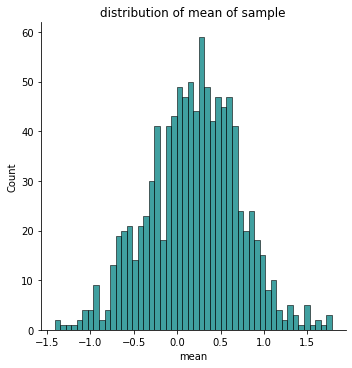

In [148]:
sns.displot(data = X.T.describe().iloc[1], bins=50, color="teal")
plt.title("distribution of mean of sample")
plt.show()

##To check if the data is normalized

I'm computing the skewness and the kurtosis of the dataset to check wheter it is normalized or not.\
I'm checking both between features and samples.

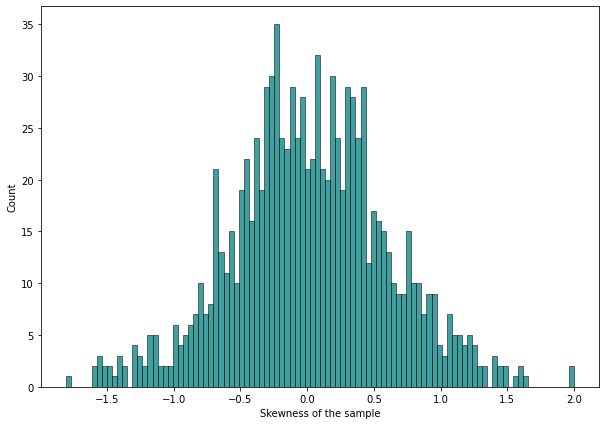

In [149]:
# To calculate the skewness
from scipy.stats import kurtosis, skew

cnames = X.T.columns
colN = np.shape(X.T)[1]
colN
df_skew_cells = []
for i in range(colN) :     
     v_df = X.T[cnames[i]]
     df_skew_cells += [skew(v_df)]
df_skew_cells

plt.figure(figsize=(10,7))
sns.histplot(df_skew_cells, bins=100, color="teal")
plt.xlabel('Skewness of the sample')
plt.show()

23


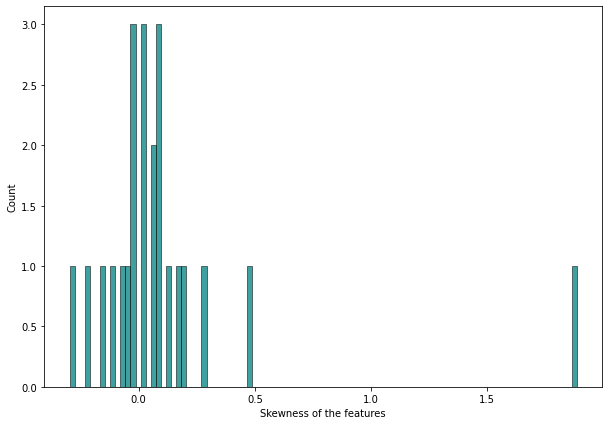

In [150]:
# To calculate the skewness
from scipy.stats import kurtosis, skew

cnames = X.columns
colN = np.shape(X)[1]
colN
df_skew_cells = []
for i in range(colN) :     
     v_df = X[cnames[i]]
     df_skew_cells += [skew(v_df)]
print(len(df_skew_cells))

plt.figure(figsize=(10,7))
sns.histplot(df_skew_cells, bins=100, color="teal")
plt.xlabel('Skewness of the features')
plt.show()

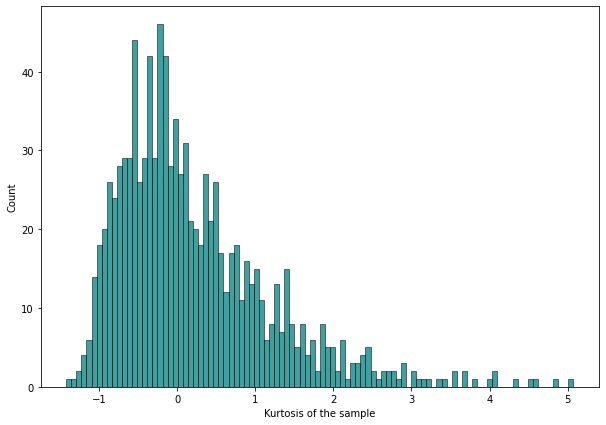

In [151]:
# To calculate the kurtosis
from scipy.stats import kurtosis, skew

cnames = X.T.columns
colN = np.shape(X.T)[1]
colN
df_skew_cells = []
for i in range(colN) :     
     v_df = X.T[cnames[i]]
     df_skew_cells += [kurtosis(v_df)]
df_skew_cells

plt.figure(figsize=(10,7))
sns.histplot(df_skew_cells, bins=100, color="teal")
plt.xlabel('Kurtosis of the sample')
plt.show()

23


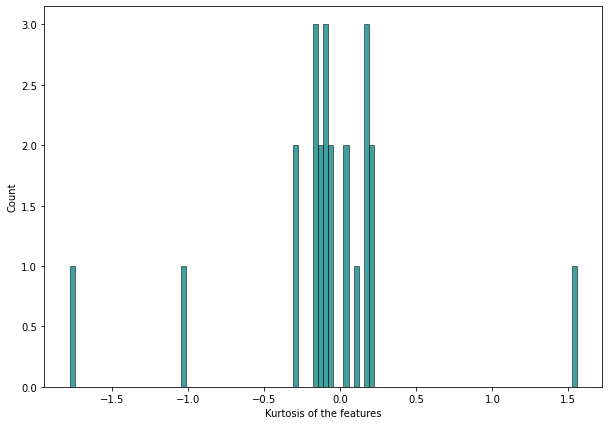

In [152]:
# To calculate the kurtosis
from scipy.stats import kurtosis, skew

cnames = X.columns
colN = np.shape(X)[1]
colN
df_skew_cells = []
for i in range(colN) :     
     v_df = X[cnames[i]]
     df_skew_cells += [kurtosis(v_df)]
print(len(df_skew_cells))

plt.figure(figsize=(10,7))
sns.histplot(df_skew_cells, bins=100, color="teal")
plt.xlabel('Kurtosis of the features')
plt.show()

We can see that the skewness is always close to 0, with some exception regaring the single sample where we have some cells that reach at most near 2 or -2.\
The Kurtosis is a little bigger in values, but most of the data has it near 0.\
This means that the distribution of the data is close to the one of a normal distribution.

## Some plots about features

Let's cosider the distibution of features in the different labels to check if there is some major difference.

In [153]:
df0 = pd.DataFrame([row for index, row in X.iterrows() if row["label"] == 0])
df1 = pd.DataFrame([row for index, row in X.iterrows() if row["label"] == 1])
df2 = pd.DataFrame([row for index, row in X.iterrows() if row["label"] == 2])
df3 = pd.DataFrame([row for index, row in X.iterrows() if row["label"] == 3])
df4 = pd.DataFrame([row for index, row in X.iterrows() if row["label"] == 4])
df_all = []
df_all.append(df0.iloc[: , 1:])
df_all.append(df1.iloc[: , 1:])
df_all.append(df2.iloc[: , 1:])
df_all.append(df3.iloc[: , 1:])
df_all.append(df4.iloc[: , 1:])

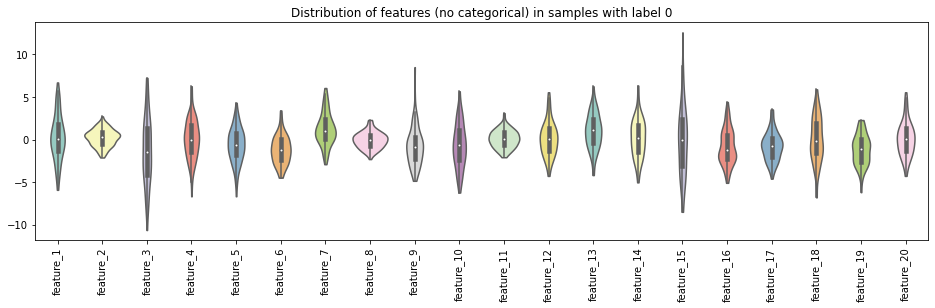

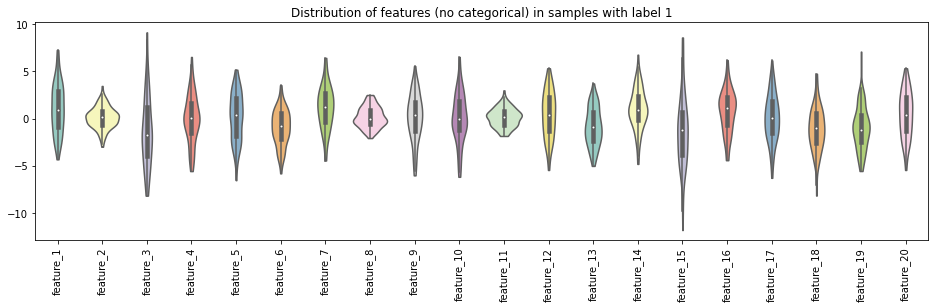

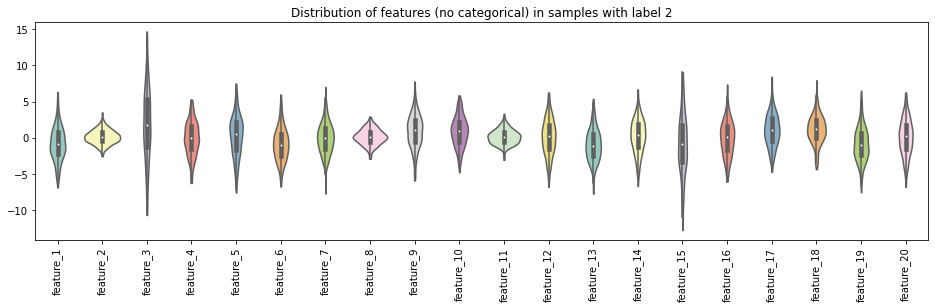

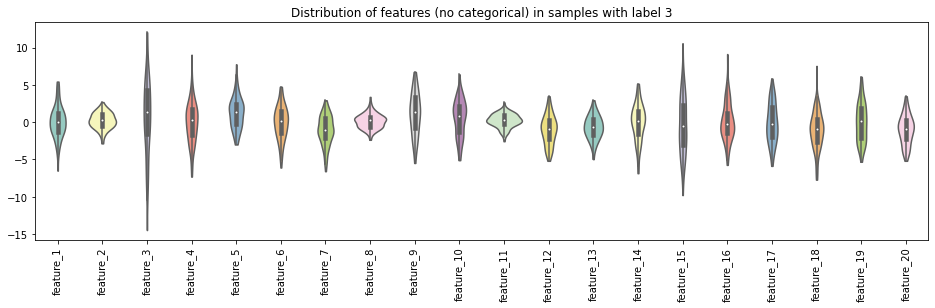

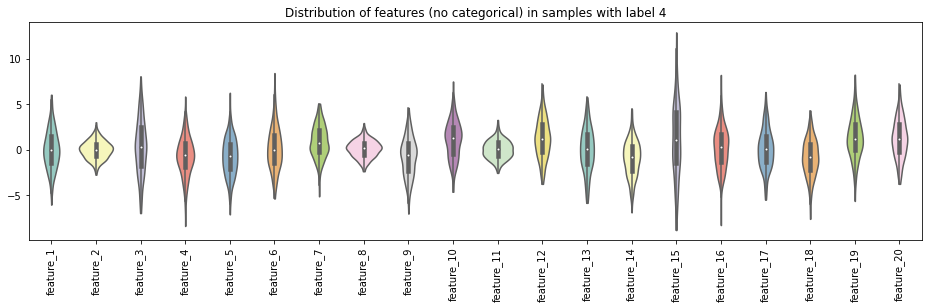

In [154]:
for index, i in enumerate(df_all):
  df_small = i.iloc[:,:-2]
  plt.figure(figsize=(16,4))
  plot=sns.violinplot(data=df_small, palette="Set3",cut=0)
  plt.setp(plot.get_xticklabels(), rotation=90)
  plt.title("Distribution of features (no categorical) in samples with label {}".format(index))
  plt.show()

No particular feature (we are not considering the categorical one) sems to stand out.

Let's now plot a displot with the distribution of the features (again, not considering the categorical one).

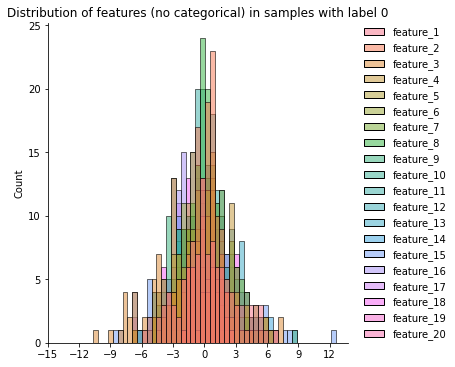

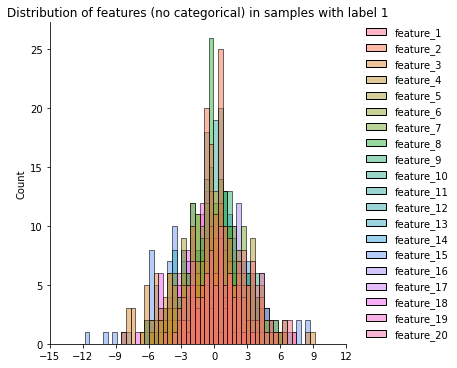

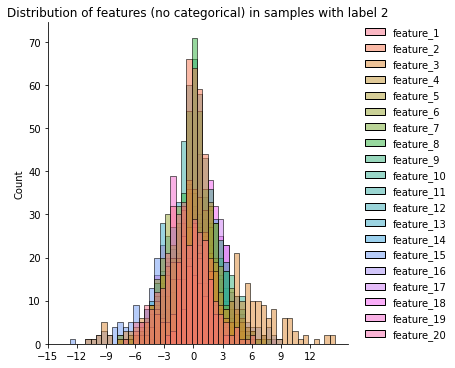

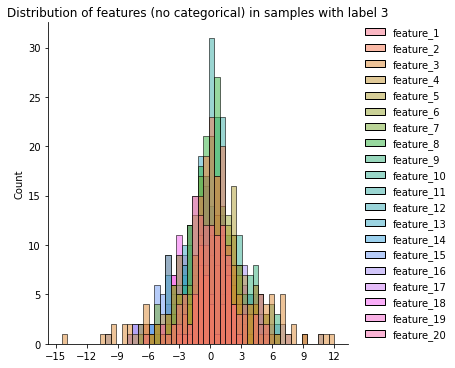

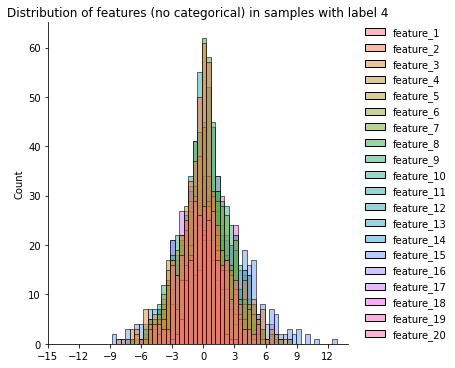

In [155]:
for index, i in enumerate(df_all):
  g = sns.displot(data = i.iloc[:,:-2], bins=50, legend = True)
  g.set(xticks=[i for i in range(-15, 15, 3)])
  plt.title("Distribution of features (no categorical) in samples with label {}".format(index))
  plt.show()

Let's now consider the categorical feature, and see if any value is particularly more expressed in a particular label.

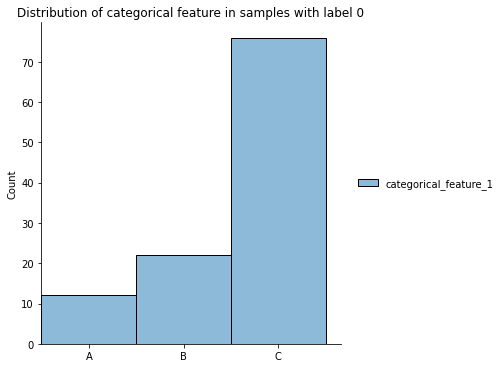

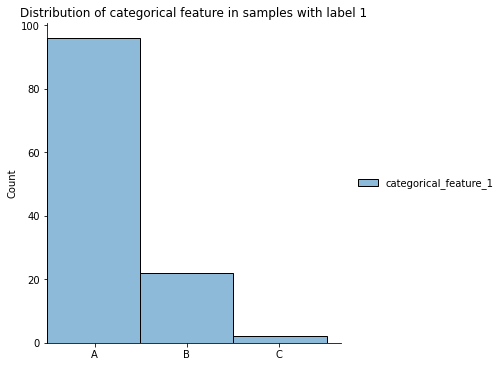

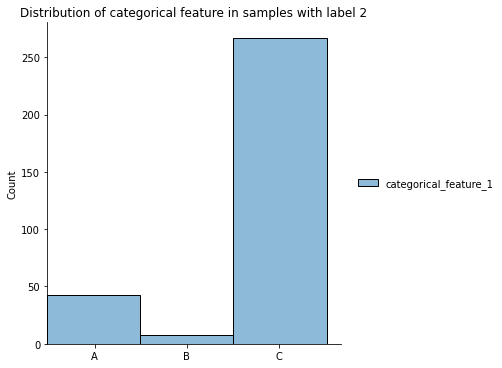

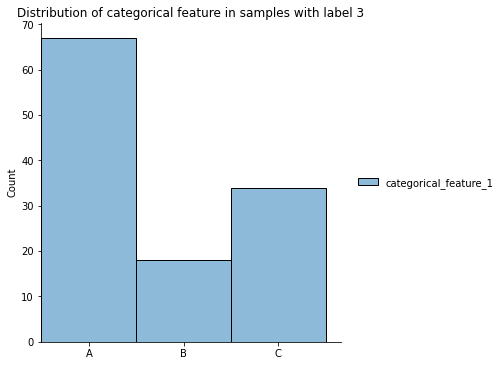

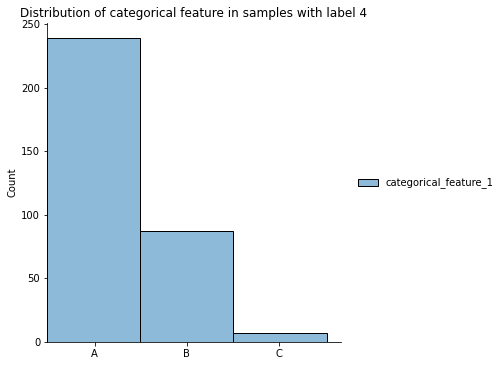

In [156]:
df0 = pd.DataFrame([row for index, row in df.iterrows() if row["label"] == 0])
df1 = pd.DataFrame([row for index, row in df.iterrows() if row["label"] == 1])
df2 = pd.DataFrame([row for index, row in df.iterrows() if row["label"] == 2])
df3 = pd.DataFrame([row for index, row in df.iterrows() if row["label"] == 3])
df4 = pd.DataFrame([row for index, row in df.iterrows() if row["label"] == 4])
df_all = []
df_all.append(df0.iloc[: , 1:])
df_all.append(df1.iloc[: , 1:])
df_all.append(df2.iloc[: , 1:])
df_all.append(df3.iloc[: , 1:])
df_all.append(df4.iloc[: , 1:])

for index, i in enumerate(df_all):
  g = sns.displot(data = i.iloc[:,-1:], bins=3, legend=True)
  g.set(xticks=[0.34, 1, 1.66], xticklabels=["A", "B", "C"], xlim=(0,2.1))
  plt.title("Distribution of categorical feature in samples with label {}".format(index))
  plt.show()

We can see that the categorical labels are not evenly distributed, but we can't just understand by this if a sample is of a particular label.

### Are there any features more important than others?

Let's now check if any of the features if more important than others using a random forest.

In [157]:
y = X.T.iloc[0]
X1 = X.iloc[: , 1:]
X1

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,cat_B,cat_C
0,-2.746297,0.226808,7.609808,-2.575392,1.308775,-2.974092,0.088369,-1.178652,3.986901,2.092175,...,-1.143292,-0.964833,1.788286,0.475470,0.219488,2.056478,-2.753515,-0.323589,0,1
1,0.966629,-0.110120,4.050193,-3.107810,-5.232349,-1.159987,2.315123,1.534287,2.685895,2.473703,...,0.238092,0.634750,-1.184116,0.872317,-0.983271,-0.411568,0.097117,2.942675,1,0
2,4.720003,0.632098,-1.022210,-1.016229,-0.578980,-0.862054,-0.029523,-1.372514,-0.604588,0.410971,...,-1.240324,-2.878665,-2.336988,-0.353704,-3.533916,-0.608522,-0.638466,0.015091,1,0
3,-1.613208,-0.476368,5.638135,-1.812430,-3.130311,1.545533,0.780998,1.371362,-0.361237,0.853047,...,3.879854,-2.584240,8.337714,2.054024,-1.883995,0.003997,3.294418,-0.797709,0,0
4,-4.481951,1.741158,4.844298,4.401993,1.568972,-0.500525,0.532060,-0.868665,1.776437,0.903451,...,0.481203,-0.194668,1.493443,2.480141,3.079591,2.135416,1.183658,1.279433,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.122726,0.922219,8.529665,-4.228659,2.358344,3.633587,-3.525462,1.228492,1.432657,-0.420298,...,-1.283796,1.325575,7.145215,7.145243,2.275568,2.944647,-1.826661,-1.885695,0,1
996,1.447254,-0.041726,1.075144,-2.523713,0.109189,2.136790,-0.429335,0.719094,1.301815,2.290508,...,0.555057,1.199342,4.186405,1.268941,-2.013460,1.103016,2.593453,1.264199,0,1
997,-1.589918,-0.693403,-6.369460,2.442269,0.497824,-1.111292,0.024205,0.934958,-1.468037,-3.052091,...,-0.164110,1.057478,2.850560,-1.392226,1.765362,1.501464,4.769080,-2.020704,0,0
998,-3.029365,0.266136,-4.779540,3.745082,-3.312940,1.766733,0.035484,0.296851,-4.168247,-2.954730,...,-1.069426,-6.869079,-5.265748,-8.267226,-1.718160,-0.089330,1.867218,0.113733,0,0


In [158]:
y

0      2.0
1      4.0
2      0.0
3      4.0
4      2.0
      ... 
995    2.0
996    3.0
997    3.0
998    4.0
999    2.0
Name: label, Length: 1000, dtype: float64

In [159]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X1, y)

RandomForestClassifier()

In [160]:
feature_importance = rf.feature_importances_

In [161]:
features = {}
for n, g in zip(X1.T.index, feature_importance):
  features[n] = g
print({k: v for k, v in sorted(features.items(), key=lambda item: item[1], reverse=True)})

{'cat_C': 0.15274059422729097, 'feature_19': 0.06864664437815049, 'feature_18': 0.06149997573137127, 'feature_9': 0.05464164276078378, 'feature_7': 0.05154933131435532, 'feature_5': 0.051223485887008285, 'feature_14': 0.05014966998520548, 'feature_3': 0.05006533294839669, 'feature_17': 0.04673735478636965, 'feature_10': 0.04333977557452819, 'feature_13': 0.040564753791508486, 'feature_1': 0.039020481956171284, 'feature_20': 0.037996615423376845, 'feature_12': 0.03687447675839839, 'feature_15': 0.03548074854200763, 'feature_6': 0.03338376647090252, 'feature_16': 0.033368064407024556, 'feature_4': 0.03218733571013867, 'feature_2': 0.024316928170805868, 'feature_8': 0.023479140984703384, 'feature_11': 0.023323005967191116, 'cat_B': 0.009410874224311161}


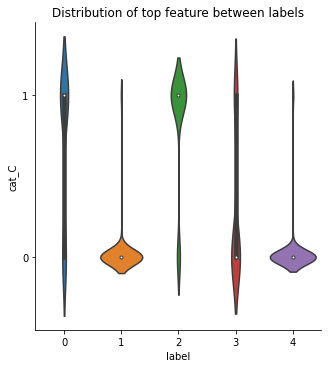

In [162]:
X1["label"] = df["label"].copy()
sns.catplot(x="label", y=max(features, key=features.get), data=X1, kind="violin")
#plt.yticks([0, 1, 2], labels=["A", "B", "C"])
plt.title("Distribution of top feature between labels")
plt.yticks([0, 1])
plt.show()

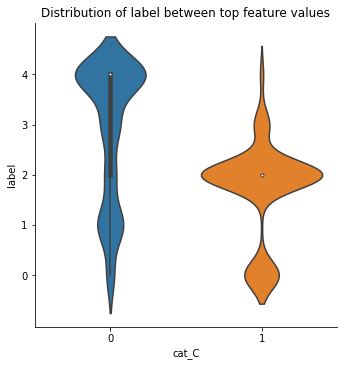

In [163]:
X1["label"] = df["label"].copy()
sns.catplot(y="label", x=max(features, key=features.get), data=X1, kind="violin")
#plt.yticks([0, 1, 2], labels=["A", "B", "C"])
plt.title("Distribution of label between top feature values")
plt.yticks([0, 1, 2, 3, 4])
plt.show()

Again, we can see that they do not have same distribution, but also that it isn't enough to classify the sampels.

#Some unsupervided ML

## PCA and Clustering

In [164]:
def plot_data_C(X, col):
  for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], 'k.', markersize=2, c=col[i])

def plot_centroids_C(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, col, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data_C(X, col)
    if show_centroids:
        plot_centroids_C(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Let's compute a PCA in 2 dimensions and plot the data.

In [165]:
pca = PCA(n_components = 2)
low = pca.fit_transform(X.iloc[: , 1:])
print(low.shape)

(1000, 2)


In [166]:
col = []
for c in df["label"]:
  if c == 0:
    col.append("r")
  elif c == 1:
    col.append("b")
  elif c == 2:
    col.append("g")
  elif col == 3:
    col.append("p")
  else:
    col.append("orange")
print(len(col))

1000


Let's now perform a kmeans-clustering

fraction of correct predictions 0.191


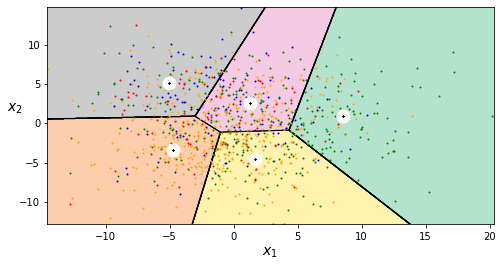

In [167]:
from sklearn import metrics
from scipy import stats

k = 5
for i in [42]:
  kmeans = KMeans(n_clusters=k, random_state=i)
  y_pred = kmeans.fit_predict(low)
  # print(accuracy_score(y_pred, MCF7_hyponormo))
  print("fraction of correct predictions", np.sum(y_pred==y) / len(y_pred))
  plt.figure(figsize=(8, 4))
  plot_decision_boundaries(kmeans, low, col)
  plt.show()

Let's now try to perform a kmeans-clustering without applying pca

In [168]:
k = 5
accuracy_scores = []
for i in [42]:
  kmeans = KMeans(n_clusters=k, random_state=i)
  y_pred = kmeans.fit_predict(X)
  print(accuracy_score(y, y_pred))
  print("fraction of correct predictions", np.sum(y_pred==y) / len(y_pred))
  accuracy_scores.append(accuracy_score(y, y_pred))

0.149
fraction of correct predictions 0.149


In [169]:
pca = PCA(n_components= 0.95)
low = pca.fit_transform(X.iloc[: , 1:])
low.shape

(1000, 13)

In [170]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum = np.append(0, cumsum)
d = np.argmax(cumsum >= 0.95)
d

13

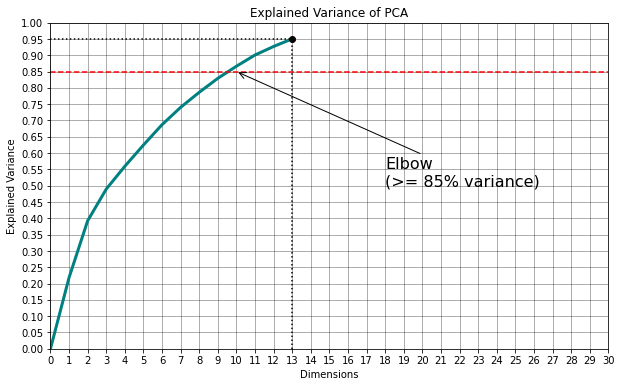

In [171]:
plt.figure(figsize=(10,6))
plt.grid(True, alpha=0.4, c="black")
plt.plot(cumsum, linewidth=3, c="teal")
plt.axis([0, 30, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.yticks(np.linspace(0,1,21))
plt.xticks(np.linspace(0,30,31))
plt.title("Explained Variance of PCA")
plt.plot([d, d], [0, cumsum[-1]], "k:")
plt.plot([0, d], [cumsum[-1], cumsum[-1]], "k:")
plt.plot(d, cumsum[-1], "ko")
plt.axhline(y=0.85, c="r", linestyle="--")
plt.annotate("Elbow\n(>= 85% variance)", xy=(np.argmax(cumsum >= 0.85), 0.85),
             xytext=(np.argmax(cumsum >= 0.85)+8, 0.5),
             arrowprops=dict(arrowstyle="->", color = "black"), fontsize=16)
# save_fig("explained_variance_plot")
plt.show()

PCA is okay. We would need 13 dimensions to keep 95% of the variance. The PCA in two dimensions is not really helpful since it maintains only 40% of the variance.\
Clustering is bad, it clusters correctly very few sampeles (about 15% in the non-PCA case and about 19% in the PCA in two dimensions case.)

# Supervided learning

##Working with original data:

In [172]:
X_or = X.T

4.0    333
2.0    318
1.0    120
3.0    119
0.0    110
Name: label, dtype: int64


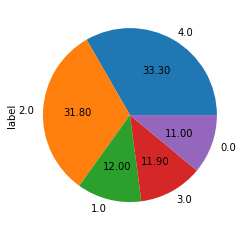

In [173]:
y = X_or.iloc[0]
print(y.value_counts())
y.value_counts().plot.pie(autopct='%.2f')
X = X_or.T

We can see that the labels are quite unbalanced. 3 out of the five labels have 110-120 occurrences, while 2 have 318-333 occunceces. This is about 3:1 ratio.\
This can be a problem because, training our classifiers, we could be giving a bias towards the more frequent labels (we have more data to trin them), while not having enough informations about the others.\
There are many different solution to this problem. The first would be to collect more data, but since this is not possible in this case, we could try to either under-sampling or over-sampling, at random, the data.\
Let's first consider the original data, and let's see how well does a Logistic model, a Random Forest, a SVM and a Neural Network perform. We will then repeat the modelling by using some random under-sampling and some random over-sampling.\
We always keep aside 10% of data to try and check the models, when I will train the final classificator I will use all the data (the Professor already has some testing data) to make it more reliable.

In [174]:
X1 = X.iloc[: , 1:]
y1 = y
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1000, 23) (1000,)
(900, 22) (900,)
(100, 22) (100,)


### Logistic

I'm trying different parameters to see which one works best, comparing them using a boxplot.\
I'm also using the class_weight="balaced" to work with the fact the the classes are unbalanced without doing a random undersample or oversample.

In [175]:
my_log_or_new_l2 = LogisticRegression(solver = "newton-cg", penalty="l2", random_state=42, class_weight = "balanced") 
scores_log_or_new_l2 = cross_val_score(my_log_or_new_l2, X_train, y_train, cv=10)
print("Cross validation score: ", scores_log_or_new_l2.mean())
my_log_or_new_l2.fit(X_train, y_train)
print("Accuracy on never seen test: ", accuracy_score(my_log_or_new_l2.predict(X_test), y_test))

Cross validation score:  0.691111111111111
Accuracy on never seen test:  0.74


In [176]:
my_log_or_lib_l2 = LogisticRegression(solver = "liblinear", penalty="l2", random_state=42, class_weight = "balanced") 
scores_log_or_lib_l2 = cross_val_score(my_log_or_lib_l2, X_train, y_train, cv=10)
print("Cross validation score: ", scores_log_or_lib_l2.mean())
my_log_or_lib_l2.fit(X_train, y_train)
print("Accuracy on never seen test: ", accuracy_score(my_log_or_lib_l2.predict(X_test), y_test))

Cross validation score:  0.7211111111111111
Accuracy on never seen test:  0.74


In [177]:
my_log_or_lib_l1 = LogisticRegression(solver = "liblinear", penalty="l1", random_state=42, class_weight = "balanced") 
scores_log_or_lib_l1 = cross_val_score(my_log_or_lib_l1, X_train, y_train, cv=10)
print("Cross validation score: ", scores_log_or_lib_l1.mean())
my_log_or_lib_l1.fit(X_train, y_train)
print("Accuracy on never seen test: ", accuracy_score(my_log_or_lib_l1.predict(X_test), y_test))

Cross validation score:  0.7188888888888889
Accuracy on never seen test:  0.74


#### A comparison for the logistic classifiers

In [178]:
scores = [('Logistic newton-cg l2', scores_log_or_new_l2),
          ('Logistic Liblinear l2', scores_log_or_lib_l2),
          ('Logistic Liblinear l1', scores_log_or_lib_l1)]

In [179]:
results = []
names = []
scoring = 'accuracy'
for name, score in scores:
  results.append(score)
  names.append(name)
  print(name, ": ", score.mean(), "({})".format(score.std()))

Logistic newton-cg l2 :  0.691111111111111 (0.06281464011156697)
Logistic Liblinear l2 :  0.7211111111111111 (0.05222222222222223)
Logistic Liblinear l1 :  0.7188888888888889 (0.048189440982669876)


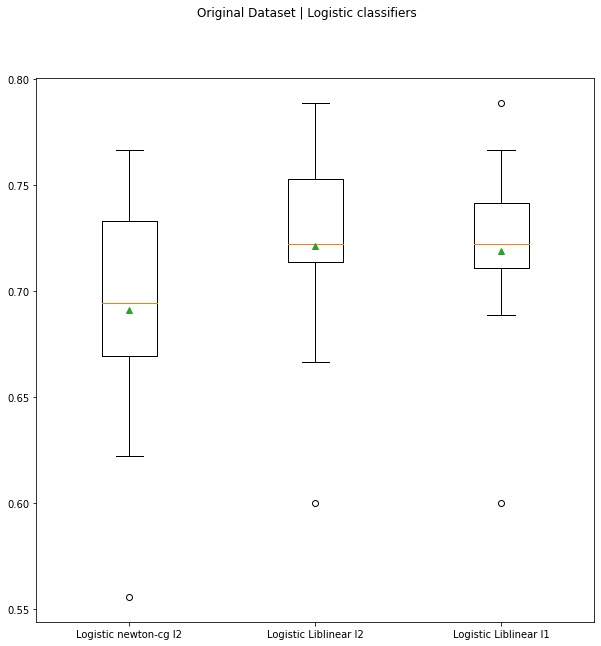

In [180]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Original Dataset | Logistic classifiers')
ax = fig.add_subplot(111)
plt.boxplot(results,  showmeans=True)
ax.set_xticklabels(names)
plt.show()

No classifier stands out particularly, but I would consider the using the Liblinear solver with penalty l2 since it has a slightly better intequantile range than the others.

### Random Forest

Let's not train a random forest, again, I'm using class_weight = "balanced" to work with the fact that the classes are unbalanced before trying with a random undersample or oversample.

In [181]:
my_rf_or_entropy = RandomForestClassifier(criterion='entropy', random_state=42, class_weight = "balanced")
scores_rf_or_entropy = cross_val_score(my_rf_or_entropy, X_train, y_train, cv=10)
print("Cross validation score: ", scores_rf_or_entropy.mean())
my_rf_or_entropy.fit(X_train, y_train)
print("Accuracy on never seen test: ", accuracy_score(my_rf_or_entropy.predict(X_test), y_test))

Cross validation score:  0.7511111111111111
Accuracy on never seen test:  0.79


In [182]:
my_rf_or_gini = RandomForestClassifier(criterion='gini', random_state=42, class_weight="balanced")
scores_rf_or_gini = cross_val_score(my_rf_or_gini, X_train, y_train, cv=10)
print("Cross validation score: ", scores_rf_or_gini.mean())
my_rf_or_gini.fit(X_train, y_train)
print("Accuracy on never seen test: ", accuracy_score(my_rf_or_gini.predict(X_test), y_test))

Cross validation score:  0.7488888888888889
Accuracy on never seen test:  0.8


#### A comparison for the Random Forest classifiers

In [183]:
scores = [('Random Forest Entropy', scores_rf_or_entropy),
          ('Random Forest Gini', scores_rf_or_gini)]

In [184]:
results = []
names = []
scoring = 'accuracy'
for name, score in scores:
  results.append(score)
  names.append(name)
  print(name, ": ", score.mean(), "({})".format(score.std()))

Random Forest Entropy :  0.7511111111111111 (0.04251361437713111)
Random Forest Gini :  0.7488888888888889 (0.03520662115056637)


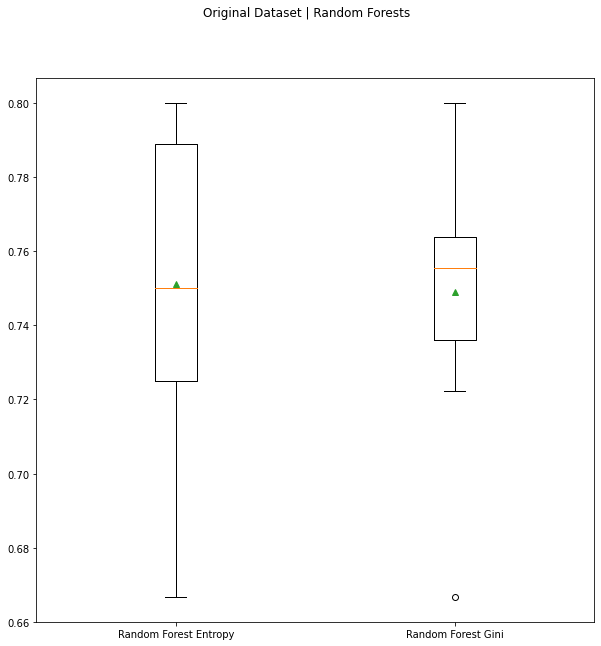

In [185]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Original Dataset | Random Forests')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
plt.show()

Even though no classifier seems to be much better than the other, I would prefer the one using Gini because it has greater minimum.

### SVM

Let's try to train a SVM classifier, just for fun and to compare. 

In [186]:
my_svm_or = NuSVC(nu = 0.3, class_weight = "balanced")
scores_svm_or = cross_val_score(my_svm_or, X_train, y_train, cv=10)
print(scores_svm_or.mean())

my_svm_or.fit(X_train, y_train)
accuracy_score(my_svm_or.predict(X_test), y_test)

0.8466666666666667


0.85

SVM is working much better than the other classifiers.

### Neural Network

Let's now try to train a Neural Network on the data, to compare it with the other classifiers.

In [187]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[22]))
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(8, activation="relu"))
model.add(keras.layers.Dense(5, activation = 'softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [188]:
mc = keras.callbacks.ModelCheckpoint('best_model_original_data.h5', monitor='val_accuracy', mode='max', save_best_only=True)
es=keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=15)

In [189]:
history = model.fit(X_train, y_train, epochs=1000, callbacks = [es, mc], validation_data=(X_test, y_test))

Epoch 1/1000
29/29 [==============================] - 1s 16ms/step - loss: 1.7400 - accuracy: 0.1922 - val_loss: 1.6623 - val_accuracy: 0.2200
Epoch 2/1000
29/29 [==============================] - 0s 4ms/step - loss: 1.5784 - accuracy: 0.2711 - val_loss: 1.5428 - val_accuracy: 0.2800
Epoch 3/1000
29/29 [==============================] - 0s 5ms/step - loss: 1.4917 - accuracy: 0.3189 - val_loss: 1.4676 - val_accuracy: 0.3400
Epoch 4/1000
29/29 [==============================] - 0s 4ms/step - loss: 1.4208 - accuracy: 0.3733 - val_loss: 1.4214 - val_accuracy: 0.3900
Epoch 5/1000
29/29 [==============================] - 0s 4ms/step - loss: 1.3629 - accuracy: 0.4144 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 6/1000
29/29 [==============================] - 0s 4ms/step - loss: 1.3093 - accuracy: 0.4700 - val_loss: 1.3312 - val_accuracy: 0.4400
Epoch 7/1000
29/29 [==============================] - 0s 4ms/step - loss: 1.2644 - accuracy: 0.5011 - val_loss: 1.2847 - val_accuracy: 0.5100
Epoch

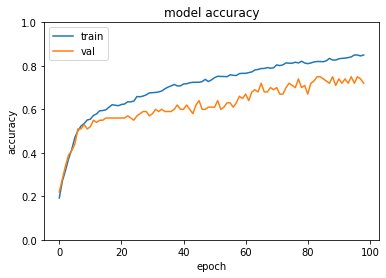

In [190]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0, 1)
plt.legend(['train', 'val'])
plt.show()

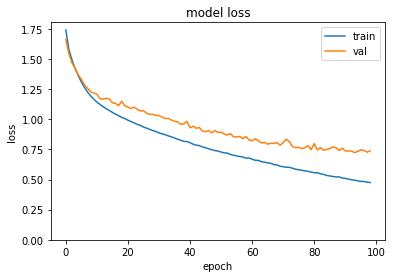

In [191]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0, )
plt.legend(['train', 'val'])
plt.show()

We can see that the Neural Network is not very good, the loss is still pretty high and the accuracy not great.

### A comparison for the classifiers

Let's now try to compare the best Logistic classifier, the best Randonm Forest Classifier and the SVM to try to get the best out of the three.

In [192]:
scores = []
scores.append(('Best Logistic Classifier', scores_log_or_lib_l2))
scores.append(('Best Random Forest Classifier', scores_rf_or_gini))
scores.append(('SVM', scores_svm_or))

In [193]:
results = []
names = []
scoring = 'accuracy'
for name, score in scores:
  results.append(score)
  names.append(name)
  print(name, ": ", score.mean(), "({})".format(score.std()))

Best Logistic Classifier :  0.7211111111111111 (0.05222222222222223)
Best Random Forest Classifier :  0.7488888888888889 (0.03520662115056637)
SVM :  0.8466666666666667 (0.0381031737766272)


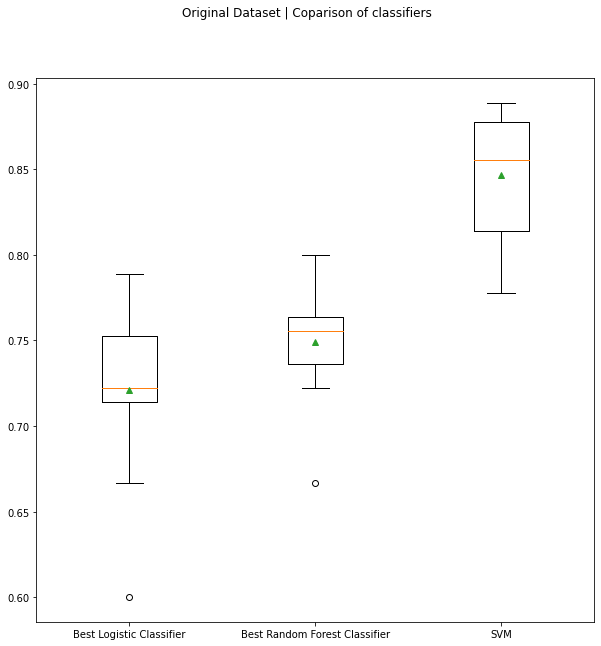

In [194]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Original Dataset | Coparison of classifiers')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
plt.show()

We can see that the SVM is much better than the others, but if I had to choose only between a Random Forest Classifier and a Logistic Classifier, working with the original data, I would choose the random forest one.

### Conclusion

Building classifiers with all the data to use with some never seen test data. 

In [195]:
my_log_or = LogisticRegression(solver = "liblinear", penalty="l2", random_state=42, class_weight="balanced") 
scores_log_or = cross_val_score(my_log_or, X1, y1, cv=10)
print("Cross validation score: ", scores_log_or.mean())

Cross validation score:  0.7270000000000001


In [196]:
my_rf_or = RandomForestClassifier(criterion='gini', random_state=42, class_weight="balanced")
scores_rf_or = cross_val_score(my_rf_or, X1, y1, cv=10)
print("Cross validation score: ", scores_rf_or.mean())

Cross validation score:  0.752


We can see that, computing a 10 folds cross validation, the mean of the accuracy turns out to be slightly better in the random forest classifier.

## Random Undersampling

Let's now use imblearn.under_sampling.RandomUnderSampler to do the same analysis on arandom undersample of the data.

(550, 23) (550,)
0.0    110
1.0    110
2.0    110
3.0    110
4.0    110
Name: label, dtype: int64


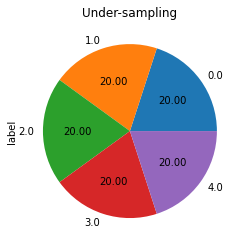

In [197]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy="auto", random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print(X_res.shape, y_res.shape)
print(y_res.value_counts())

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

We can see that now we have less data to work with, but we at least have a balanced dataset.

In [198]:
# X1 = X.drop(X.tail(1).index,inplace=False)
# print(X_res)
# X1  = X_res.iloc[1:]
# Drop first column of dataframe
X1 = X_res.iloc[: , 1:]
y1 = y_res
print(X_res.shape, y_res.shape)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(550, 23) (550,)
(495, 22) (495,)
(55, 22) (55,)


### Logistic

I'm trying different parameters to see which one works best, comparing them using a boxplot.\
I'm also **not** using the class_weight="balaced" because we have now balanced classes.

In [199]:
my_log_un_new_l2 = LogisticRegression(solver = "newton-cg", penalty="l2", random_state=42) 
scores_log_un_new_l2 = cross_val_score(my_log_un_new_l2, X_train, y_train, cv=10)
print("Cross validation score: ", scores_log_un_new_l2.mean())
my_log_un_new_l2.fit(X_train, y_train)
print("Accuracy on never seen test: ", accuracy_score(my_log_un_new_l2.predict(X_test), y_test))

Cross validation score:  0.6123673469387756
Accuracy on never seen test:  0.6363636363636364


In [200]:
my_log_un_lib_l2 = LogisticRegression(solver = "liblinear", penalty="l2", random_state=42) 
scores_log_un_lib_l2 = cross_val_score(my_log_un_lib_l2, X_train, y_train, cv=10)
print("Cross validation score: ", scores_log_un_lib_l2.mean())
my_log_un_lib_l2.fit(X_train, y_train)
print("Accuracy on never seen test: ", accuracy_score(my_log_un_lib_l2.predict(X_test), y_test))

Cross validation score:  0.6164489795918368
Accuracy on never seen test:  0.6


In [201]:
my_log_un_lib_l1 = LogisticRegression(solver = "liblinear", penalty="l1", random_state=42) 
scores_log_un_lib_l1 = cross_val_score(my_log_un_lib_l1, X_train, y_train, cv=10)
print("Cross validation score: ", scores_log_un_lib_l1.mean())
my_log_un_lib_l1.fit(X_train, y_train)
print("Accuracy on never seen test: ", accuracy_score(my_log_un_lib_l1.predict(X_test), y_test))

Cross validation score:  0.6325714285714285
Accuracy on never seen test:  0.6181818181818182


#### A comparison for the logistic classifiers

In [202]:
scores = [('Logistic newton-cg l2', scores_log_un_new_l2),
          ('Logistic Liblinear l2', scores_log_un_lib_l2),
          ('Logistic Liblinear l1', scores_log_un_lib_l1)]

In [203]:
results = []
names = []
scoring = 'accuracy'
for name, score in scores:
  results.append(score)
  names.append(name)
  print(name, ": ", score.mean(), "({})".format(score.std()))

Logistic newton-cg l2 :  0.6123673469387756 (0.07869829143350109)
Logistic Liblinear l2 :  0.6164489795918368 (0.06942545194494065)
Logistic Liblinear l1 :  0.6325714285714285 (0.06768420190122221)


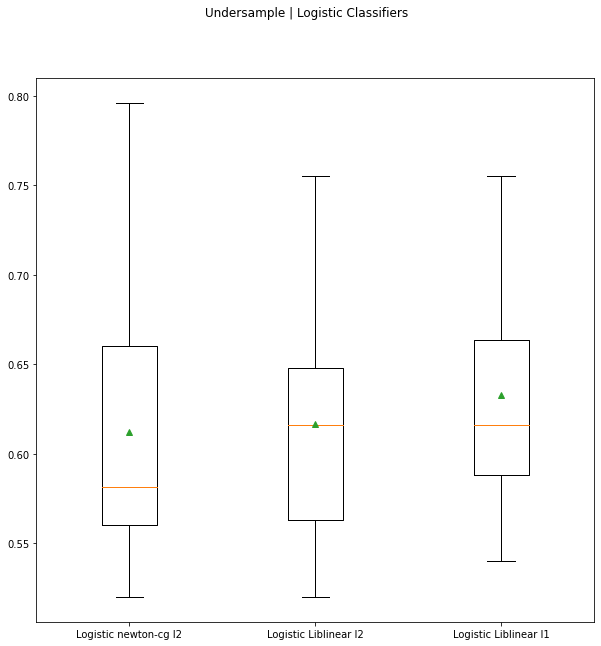

In [204]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Undersample | Logistic Classifiers')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
plt.show()

No classifier stands out particularly, but I would consider the using the Liblinear solver with penalty l1 since it has a slightly greater minimum value.

### Random Forest

Let's not train a random forest, again, I'm **not** using class_weight = "balanced" because I have now balanced classes.

In [205]:
my_rf_un_entropy = RandomForestClassifier(criterion='entropy', random_state=42)
scores_rf_un_entropy = cross_val_score(my_rf_un_entropy, X_train, y_train, cv=10)
print("Cross validation score: ", scores_rf_un_entropy.mean())
my_rf_un_entropy.fit(X_train, y_train)
print("Accuracy on never seen test: ", accuracy_score(my_rf_un_entropy.predict(X_test), y_test))

Cross validation score:  0.7031428571428572
Accuracy on never seen test:  0.7272727272727273


In [206]:
my_rf_un_gini = RandomForestClassifier(criterion='gini', random_state=42)
scores_rf_un_gini = cross_val_score(my_rf_un_gini, X_train, y_train, cv=10)
print("Cross validation score: ", scores_rf_un_gini.mean())
my_rf_un_gini.fit(X_train, y_train)
print("Accuracy on never seen test: ", accuracy_score(my_rf_un_gini.predict(X_test), y_test))

Cross validation score:  0.7133061224489796
Accuracy on never seen test:  0.6909090909090909


#### A comparison for the Random Forest classifiers

In [207]:
scores = [('Random Forest Entropy', scores_rf_un_entropy),
          ('Random Forest Gini', scores_rf_un_gini)]

In [208]:
results = []
names = []
scoring = 'accuracy'
for name, score in scores:
  results.append(score)
  names.append(name)
  print(name, ": ", score.mean(), "({})".format(score.std()))

Random Forest Entropy :  0.7031428571428572 (0.05324709986764414)
Random Forest Gini :  0.7133061224489796 (0.060392772446420245)


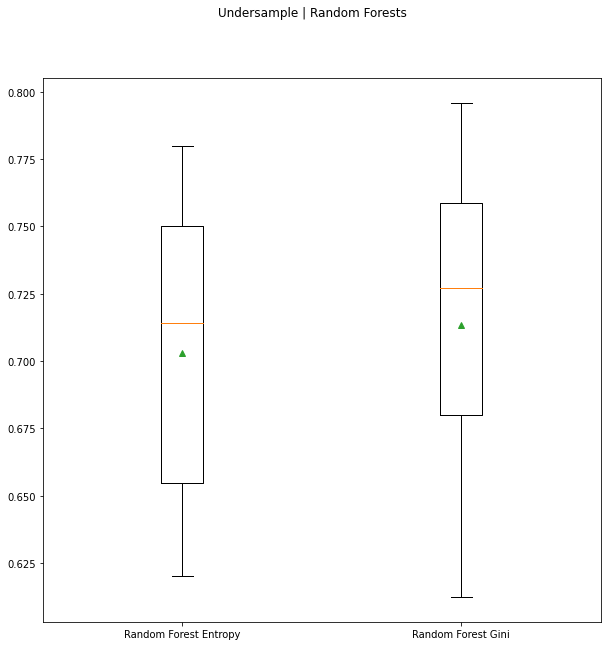

In [209]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Undersample | Random Forests')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
plt.show()

Even though no classifier seems to be much better than the other, I would prefer the one using Gini because it has higher maximum and mean.

### SVM

Let's try to train a SVM classifier, just for fun and to compare. 

In [210]:
my_svm_un = NuSVC(nu = 0.3)
scores_svm_un = cross_val_score(my_svm_un, X_train, y_train, cv=10)
print(scores_svm_un.mean())

my_svm_un.fit(X_train, y_train)
accuracy_score(my_svm_un.predict(X_test), y_test)

0.7655102040816326


0.8181818181818182

SVM is working much better than the other classifiers.

### Neural Network

Let's now try to train a Neural Network on the data, to compare it with the other classifiers.

In [211]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[22]))
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(8, activation="relu"))
model.add(keras.layers.Dense(5, activation = 'softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [212]:
mc = keras.callbacks.ModelCheckpoint('best_model_under_data.h5', monitor='val_accuracy', mode='max', save_best_only=True)
es=keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=15)

In [213]:
history = model.fit(X_train, y_train, epochs=1000, callbacks = [es, mc], validation_data=(X_test, y_test))

Epoch 1/1000
16/16 [==============================] - 1s 28ms/step - loss: 1.6366 - accuracy: 0.2081 - val_loss: 1.5993 - val_accuracy: 0.2909
Epoch 2/1000
16/16 [==============================] - 0s 6ms/step - loss: 1.6179 - accuracy: 0.2222 - val_loss: 1.5875 - val_accuracy: 0.3091
Epoch 3/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.6022 - accuracy: 0.2404 - val_loss: 1.5806 - val_accuracy: 0.3091
Epoch 4/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.5882 - accuracy: 0.2626 - val_loss: 1.5745 - val_accuracy: 0.2909
Epoch 5/1000
16/16 [==============================] - 0s 4ms/step - loss: 1.5770 - accuracy: 0.2707 - val_loss: 1.5696 - val_accuracy: 0.3091
Epoch 6/1000
16/16 [==============================] - 0s 4ms/step - loss: 1.5669 - accuracy: 0.2808 - val_loss: 1.5631 - val_accuracy: 0.2727
Epoch 7/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.5576 - accuracy: 0.2889 - val_loss: 1.5558 - val_accuracy: 0.2909
Epoch

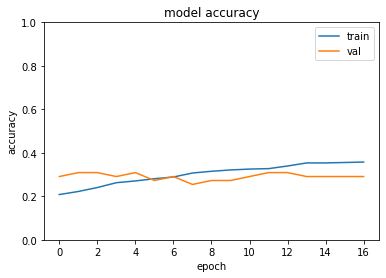

In [214]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0, 1)
plt.legend(['train', 'val'])
plt.show()

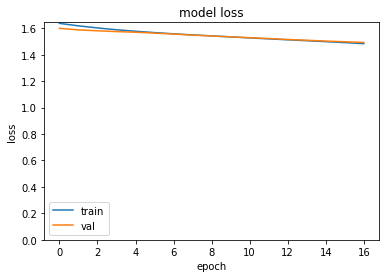

In [215]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0, )
plt.legend(['train', 'val'])
plt.show()

We can see that the Neural Network is not very good, the loss is still pretty high and the accuracy not great.

### A comparison for the classifiers

Let's now try to compare the best Logistic classifier, the best Randonm Forest Classifier and the SVM to try to get the best out of the three.

In [216]:
scores = []
scores.append(('Best Logistic Classifier', scores_log_un_lib_l1))
scores.append(('Best Random Forest Classifier', scores_rf_un_gini))
scores.append(('SVM', scores_svm_un))

In [217]:
results = []
names = []
scoring = 'accuracy'
for name, score in scores:
  results.append(score)
  names.append(name)
  print(name, ": ", score.mean(), "({})".format(score.std()))

Best Logistic Classifier :  0.6325714285714285 (0.06768420190122221)
Best Random Forest Classifier :  0.7133061224489796 (0.060392772446420245)
SVM :  0.7655102040816326 (0.05022805135436913)


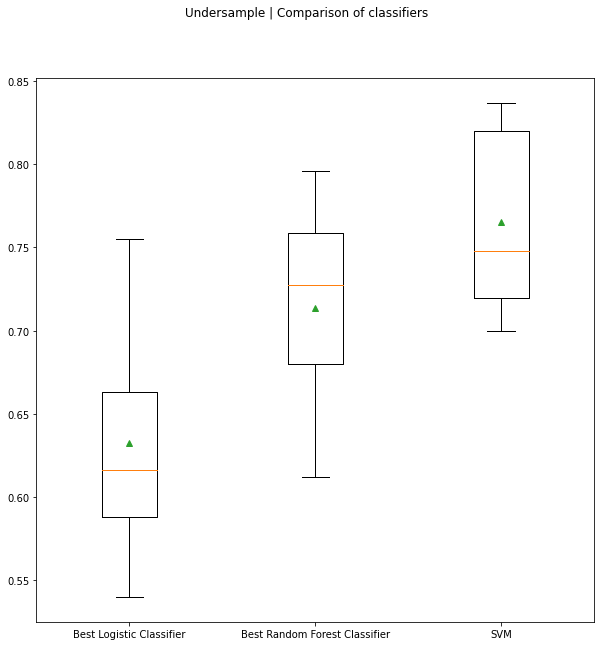

In [218]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Undersample | Comparison of classifiers')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
plt.show()

We can see that the SVM is better than the others, but if I had to choose only between a Random Forest Classifier and a Logistic Classifier, working with the original data, I would choose the random forest one.

### Conclusion

Building classifiers with all the data to use with some never seen test data. 

In [219]:
my_log_un = LogisticRegression(solver = "liblinear", penalty="l1", random_state=42) 
scores_log_un = cross_val_score(my_log_un, X1, y1, cv=10)
print("Cross validation score: ", scores_log_un.mean())

Cross validation score:  0.6381818181818182


In [220]:
my_rf_un = RandomForestClassifier(criterion='gini', random_state=42)
scores_rf_un = cross_val_score(my_rf_un, X1, y1, cv=10)
print("Cross validation score: ", scores_rf_un.mean())

Cross validation score:  0.7127272727272727


We can see that, computing a 10 folds cross validation, the mean of the accuracy turns out to be better in the random forest classifier.

## Random Oversampling

Let's now try to randomly oversample the data. This could cause overfitting.

(1665, 23) (1665,)
2.0    333
4.0    333
0.0    333
3.0    333
1.0    333
Name: label, dtype: int64


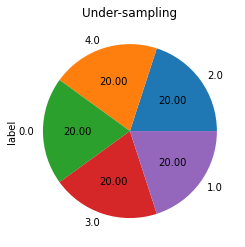

In [221]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(sampling_strategy="auto", random_state=42)
X_over, y_over = rus.fit_resample(X, y)
print(X_over.shape, y_over.shape)
print(y_over.value_counts())

ax = y_over.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

We can see that the classes are now balanced, and we hame much more data than before.

In [222]:
# X1 = X.drop(X.tail(1).index,inplace=False)
# print(X_res)
# X1  = X_res.iloc[1:]
# Drop first column of dataframe
X1 = X_over.iloc[: , 1:]
y1 = y_over
print(X_over.shape, y_over.shape)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1665, 23) (1665,)
(1498, 22) (1498,)
(167, 22) (167,)


### Logistic

I'm trying different parameters to see which one works best, comparing them using a boxplot.\
I'm also **not** using the class_weight="balaced" because we have now balanced classes.

In [223]:
my_log_ov_new_l2 = LogisticRegression(solver = "newton-cg", penalty="l2", random_state=42) 
scores_log_ov_new_l2 = cross_val_score(my_log_ov_new_l2, X_train, y_train, cv=10)
print("Cross validation score: ", scores_log_ov_new_l2.mean())
my_log_ov_new_l2.fit(X_train, y_train)
print("Accuracy on never seen test: ", accuracy_score(my_log_ov_new_l2.predict(X_test), y_test))

Cross validation score:  0.6995928411633109
Accuracy on never seen test:  0.688622754491018


In [224]:
my_log_ov_lib_l2 = LogisticRegression(solver = "liblinear", penalty="l2", random_state=42) 
scores_log_ov_lib_l2 = cross_val_score(my_log_ov_lib_l2, X_train, y_train, cv=10)
print("Cross validation score: ", scores_log_ov_lib_l2.mean())
my_log_ov_lib_l2.fit(X_train, y_train)
print("Accuracy on never seen test: ", accuracy_score(my_log_ov_lib_l2.predict(X_test), y_test))

Cross validation score:  0.7029351230425057
Accuracy on never seen test:  0.6826347305389222


In [225]:
my_log_ov_lib_l1 = LogisticRegression(solver = "liblinear", penalty="l1", random_state=42) 
scores_log_ov_lib_l1 = cross_val_score(my_log_ov_lib_l1, X_train, y_train, cv=10)
print("Cross validation score: ", scores_log_ov_lib_l1.mean())
my_log_ov_lib_l1.fit(X_train, y_train)
print("Accuracy on never seen test: ", accuracy_score(my_log_ov_lib_l1.predict(X_test), y_test))

Cross validation score:  0.7049351230425056
Accuracy on never seen test:  0.6766467065868264


#### A comparison for the logistic classifiers

In [226]:
scores = [('Logistic newton-cg l2', scores_log_ov_new_l2),
          ('Logistic Liblinear l2', scores_log_ov_lib_l2),
          ('Logistic Liblinear l1', scores_log_ov_lib_l1)]

In [227]:
results = []
names = []
scoring = 'accuracy'
for name, score in scores:
  results.append(score)
  names.append(name)
  print(name, ": ", score.mean(), "({})".format(score.std()))

Logistic newton-cg l2 :  0.6995928411633109 (0.038637803771509514)
Logistic Liblinear l2 :  0.7029351230425057 (0.03684547431467651)
Logistic Liblinear l1 :  0.7049351230425056 (0.03764842680456941)


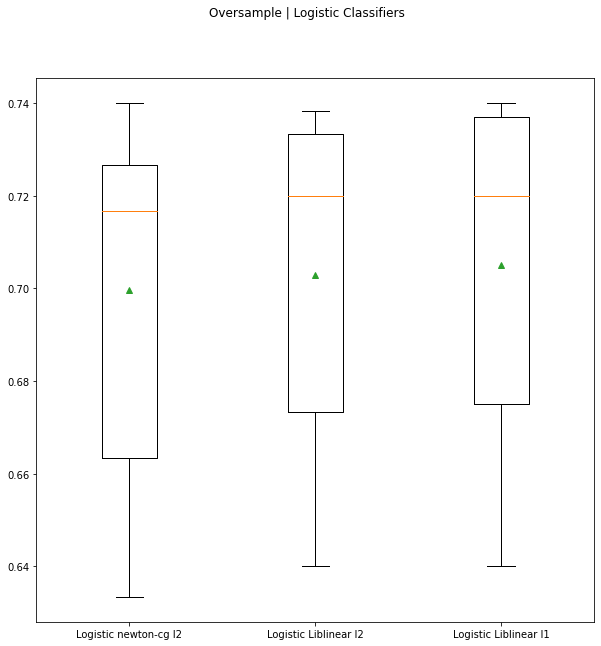

In [228]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Oversample | Logistic Classifiers')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
plt.show()

No classifier stands out particularly, but I would consider the using the Liblinear solver with penalty l1 since it has a slightly greater mean value.

### Random Forest

Let's not train a random forest, again, I'm **not** using class_weight = "balanced" because I have now balanced classes.

In [229]:
my_rf_ov_entropy = RandomForestClassifier(criterion='entropy', random_state=42)
scores_rf_ov_entropy = cross_val_score(my_rf_ov_entropy, X_train, y_train, cv=10)
print("Cross validation score: ", scores_rf_ov_entropy.mean())
my_rf_ov_entropy.fit(X_train, y_train)
print("Accuracy on never seen test: ", accuracy_score(my_rf_ov_entropy.predict(X_test), y_test))

Cross validation score:  0.9278926174496644
Accuracy on never seen test:  0.9520958083832335


In [230]:
my_rf_ov_gini = RandomForestClassifier(criterion='gini', random_state=42)
scores_rf_ov_gini = cross_val_score(my_rf_ov_gini, X_train, y_train, cv=10)
print("Cross validation score: ", scores_rf_ov_gini.mean())
my_rf_ov_gini.fit(X_train, y_train)
print("Accuracy on never seen test: ", accuracy_score(my_rf_ov_gini.predict(X_test), y_test))

Cross validation score:  0.9285637583892618
Accuracy on never seen test:  0.9640718562874252


We can see that, using a random oversample, the Random Forest works much better than before. We know that random forests tend to not overfit, but I will later check better. I'm happy with the result.

#### A comparison for the Random Forest classifiers

In [231]:
scores = [('Random Forest Entropy', scores_rf_ov_entropy),
          ('Random Forest Gini', scores_rf_ov_gini)]

In [232]:
results = []
names = []
scoring = 'accuracy'
for name, score in scores:
  results.append(score)
  names.append(name)
  print(name, ": ", score.mean(), "({})".format(score.std()))

Random Forest Entropy :  0.9278926174496644 (0.02444294278245832)
Random Forest Gini :  0.9285637583892618 (0.019652758853114335)


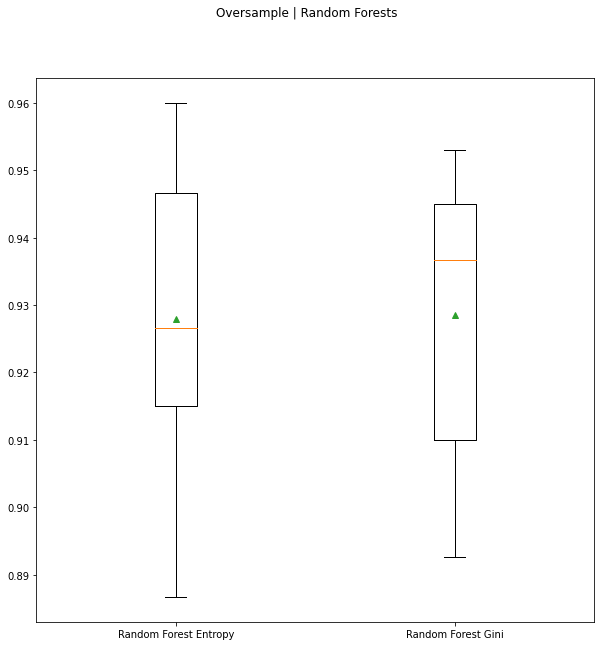

In [233]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Oversample | Random Forests')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
plt.show()

Even though no classifier seems to be much better than the other, I would prefer the one using Gini because it has higher median.

### SVM

Let's try to train a SVM classifier, just for fun and to compare. 

In [234]:
my_svm_ov = NuSVC(nu = 0.3)
scores_svm_ov = cross_val_score(my_svm_ov, X_train, y_train, cv=10)
print(scores_svm_un.mean())

my_svm_ov.fit(X_train, y_train)
accuracy_score(my_svm_ov.predict(X_test), y_test)

0.7655102040816326


0.8802395209580839

SVM is working better than the logistic classifier but worse than the random forest.

### Neural Network

Let's now try to train a Neural Network on the data, to compare it with the other classifiers.

In [235]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[22]))
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(8, activation="relu"))
model.add(keras.layers.Dense(5, activation = 'softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [236]:
mc = keras.callbacks.ModelCheckpoint('best_model_over_data.h5', monitor='val_accuracy', mode='max', save_best_only=True)
es=keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=15)

In [237]:
history = model.fit(X_train, y_train, epochs=1000, callbacks = [es, mc], validation_data=(X_test, y_test))

Epoch 1/1000
47/47 [==============================] - 1s 10ms/step - loss: 1.7658 - accuracy: 0.1722 - val_loss: 1.6623 - val_accuracy: 0.1916
Epoch 2/1000
47/47 [==============================] - 0s 3ms/step - loss: 1.6115 - accuracy: 0.2490 - val_loss: 1.6029 - val_accuracy: 0.2275
Epoch 3/1000
47/47 [==============================] - 0s 3ms/step - loss: 1.5530 - accuracy: 0.3071 - val_loss: 1.5636 - val_accuracy: 0.2814
Epoch 4/1000
47/47 [==============================] - 0s 3ms/step - loss: 1.5126 - accuracy: 0.3284 - val_loss: 1.5321 - val_accuracy: 0.3114
Epoch 5/1000
47/47 [==============================] - 0s 3ms/step - loss: 1.4783 - accuracy: 0.3598 - val_loss: 1.5024 - val_accuracy: 0.3353
Epoch 6/1000
47/47 [==============================] - 0s 3ms/step - loss: 1.4459 - accuracy: 0.3745 - val_loss: 1.4758 - val_accuracy: 0.3593
Epoch 7/1000
47/47 [==============================] - 0s 3ms/step - loss: 1.4146 - accuracy: 0.3965 - val_loss: 1.4471 - val_accuracy: 0.3952
Epoch

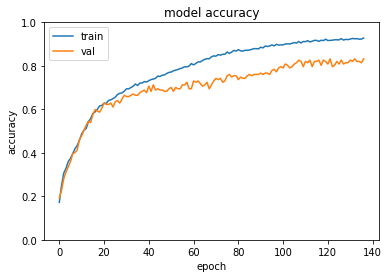

In [238]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0, 1)
plt.legend(['train', 'val'])
plt.show()

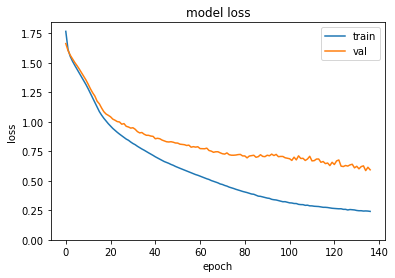

In [239]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0, )
plt.legend(['train', 'val'])
plt.show()

We can see that the neural network is working much better than before, even though the val-loss is still quite high.

### A comparison for the classifiers

Let's now try to compare the best Logistic classifier, the best Randonm Forest Classifier and the SVM to try to get the best out of the three.

In [240]:
scores = []
scores.append(('Best Logistic Classifier', scores_log_ov_lib_l1))
scores.append(('Best Random Forest Classifier', scores_rf_ov_gini))
scores.append(('SVM', scores_svm_ov))

In [241]:
results = []
names = []
scoring = 'accuracy'
for name, score in scores:
  results.append(score)
  names.append(name)
  print(name, ": ", score.mean(), "({})".format(score.std()))

Best Logistic Classifier :  0.7049351230425056 (0.03764842680456941)
Best Random Forest Classifier :  0.9285637583892618 (0.019652758853114335)
SVM :  0.8938523489932887 (0.034751872272703044)


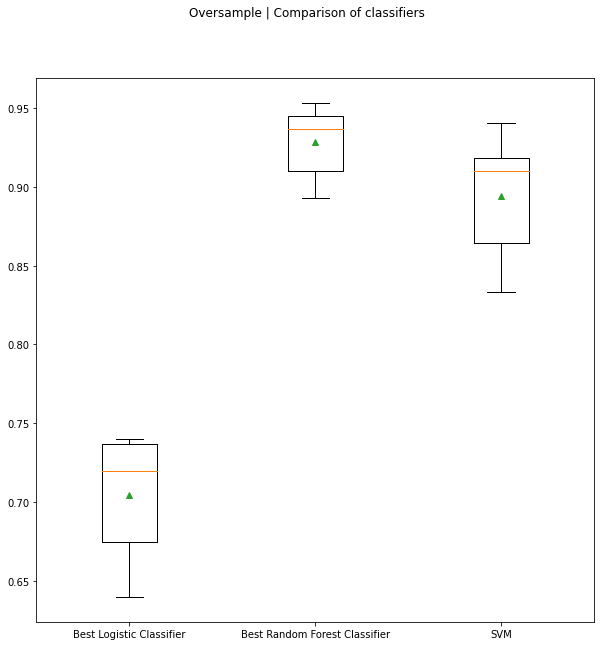

In [242]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Oversample | Comparison of classifiers')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
plt.show()

We can see that the logistic classifier is much worse than the other two, the random forests gives really nice results.

### Conclusion

Building classifiers with all the data to use with some never seen test data. 

In [243]:
my_log_ov = LogisticRegression(solver = "liblinear", penalty="l1", random_state=42) 
scores_log_ov = cross_val_score(my_log_ov, X1, y1, cv=10)
print("Cross validation score: ", scores_log_ov.mean())

Cross validation score:  0.7015727580982613


In [244]:
my_rf_ov = RandomForestClassifier(criterion='gini', random_state=42)
scores_rf_ov = cross_val_score(my_rf_ov, X1, y1, cv=10)
print("Cross validation score: ", scores_rf_ov.mean())

Cross validation score:  0.9453935502488997


We can see that, computing a 10 folds cross validation, the mean of the accuracy turns out to be much much better in the random forest classifier.

## A comparison between the original data best classifiers, the oversampling best classifiers and the undersampling best classifiers

Let's now compare the best classifier each for the original dataset, the undersampling and the oversampling one. The classifiers are the ones trained in all the data and valuated using the cross validation.

In [245]:
scores = []
scores.append(('Original (random forest - gini)', scores_rf_or))
scores.append(('Undersample (random forest - gini)', scores_rf_un))
scores.append(('Oversample (random forest - gini)', scores_rf_ov))

In [246]:
results = []
names = []
scoring = 'accuracy'
for name, score in scores:
  results.append(score)
  names.append(name)
  print(name, ": ", score.mean(), "({})".format(score.std()))

Original (random forest - gini) :  0.752 (0.016000000000000014)
Undersample (random forest - gini) :  0.7127272727272727 (0.037083778280674815)
Oversample (random forest - gini) :  0.9453935502488997 (0.021759397772018272)


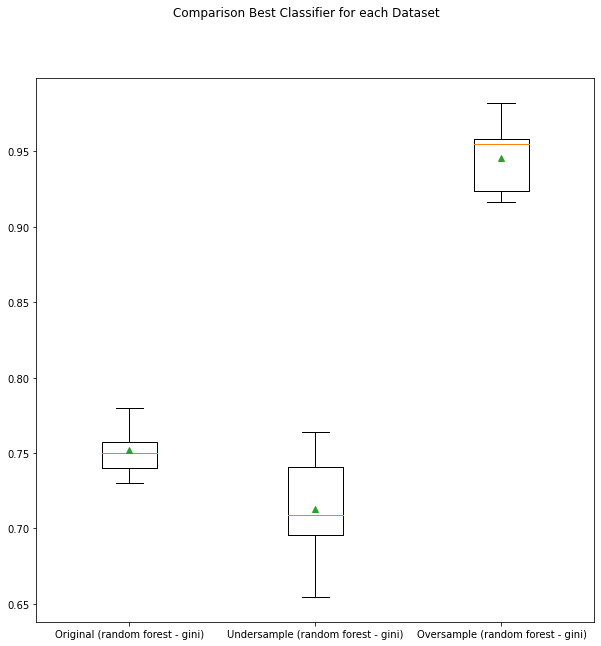

In [247]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Best Classifier for each Dataset')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
plt.show()

We can see that in general, with this dataset, the random forest works better both in the original, undersample and oversample dataset.\
Building the classifier with the Oversample dataset is much better, but we might have overfitting problems (even though random forests should have not this problem).

## Emsembling with all the data (original dataset)

One last try, with the original data, could be to build an ensebling method using different classifiers. First I look whether the errors that the 3 classifiers from the original data are the same or not.

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,1:], y, test_size=0.1, random_state=42)

In [249]:
my_log_final = LogisticRegression(solver = "liblinear", penalty="l2", random_state=42, class_weight="balanced") 
my_rf_final = RandomForestClassifier(criterion='gini', random_state=42, class_weight="balanced")
my_svm_final = NuSVC(nu = 0.3, class_weight = "balanced")

my_log_final.fit(X_train, y_train)
my_rf_final.fit(X_train, y_train)
my_svm_final.fit(X_train, y_train)

NuSVC(class_weight='balanced', nu=0.3)

In [250]:
predictions = my_log_final.predict(X_test)
log = set()
for input, prediction, label in zip(X_test.T, predictions, y_test):
  if prediction != label:
    log.add(str(input) + ' has been classified as ' + str(prediction) + ' and should be ' + str(label)) 

predictions = my_rf_final.predict(X_test)
rf = set()
for input, prediction, label in zip(X_test.T, predictions, y_test):
  if prediction != label:
    rf.add(str(input) + ' has been classified as ' + str(prediction) + ' and should be ' + str(label)) 


predictions = my_svm_final.predict(X_test)
svm = set()
for input, prediction, label in zip(X_test.T, predictions, y_test):
  if prediction != label:
    svm.add(str(input) + ' has been classified as ' + str(prediction) + ' and should be ' + str(label))  


print("Errors in logistic: ", len(log))
print("Errors in random forest: ", len(rf))
print("Errors in SVM: ", len(svm))
print("Differences between the errors of the classificators: ", len((log | rf | svm) - (log & rf & svm)))
# print("Differences between the errors of the classificators: ", len((log | rf ) - (log & rf)))

Errors in logistic:  26
Errors in random forest:  20
Errors in SVM:  15
Differences between the errors of the classificators:  39


Because the differences of the errors of the 3 classifiers is higher than the number of error of each classifier, we can say that each classifier makes different mistakes. The ensembling method could solve it.

In [251]:
my_log_final = LogisticRegression(solver = "liblinear", penalty="l2", random_state=42, class_weight="balanced") 
my_rf_final = RandomForestClassifier(criterion='gini', random_state=42, class_weight="balanced")
my_svm_final = NuSVC(nu = 0.3, class_weight = "balanced")

Using soft voting and only logistic and random forest:

In [252]:
from sklearn.ensemble import VotingClassifier


voting = VotingClassifier(estimators=[('lr', my_log_final), 
                                      ('rf', my_rf_final)],
                           voting = "soft", weights= None)

voting.fit(X_train, y_train)
print("Prediction on unseen data:", accuracy_score(voting.predict(X_test), y_test))

scores_ensembling = cross_val_score(voting, X_train, y_train, cv=10)
print("Cross Validation Score: ", scores_ensembling.mean())

Prediction on unseen data: 0.79
Cross Validation Score:  0.7644444444444446


We can see that it performs ok on unseen data (79%) and it has an okay cross_validation mean score (76.44%)

Using hard-voting with logistic, randomforest and svm:

In [253]:
from sklearn.ensemble import VotingClassifier


voting = VotingClassifier(estimators=[('lr', my_log_final), 
                                      ('rf', my_rf_final),
                                      ('svm', my_svm_final)],
                           voting = "hard", weights= None)

voting.fit(X_train, y_train)
print("Prediction on unseen data:", accuracy_score(voting.predict(X_test), y_test))

scores_ensembling = cross_val_score(voting, X_train, y_train, cv=10)
print("Cross Validation Score: ", scores_ensembling.mean())

Prediction on unseen data: 0.84
Cross Validation Score:  0.8133333333333332


We can see that it performs ok on unseen data (84%) and it has an okay cross_validation mean score (81%)

We can use the following code to print the mistakes made.

In [254]:
predictions = voting.predict(X_test)
for input, prediction, label in zip(X_test.T, predictions, y_test):
  if prediction != label:
    print(input, 'has been classified as ', prediction, 'and should be ', label) 

660 has been classified as  2.0 and should be  3.0
938 has been classified as  2.0 and should be  0.0
371 has been classified as  2.0 and should be  1.0
210 has been classified as  1.0 and should be  4.0
974 has been classified as  4.0 and should be  1.0
277 has been classified as  1.0 and should be  3.0
601 has been classified as  2.0 and should be  0.0
617 has been classified as  4.0 and should be  0.0
209 has been classified as  1.0 and should be  3.0
662 has been classified as  4.0 and should be  2.0
493 has been classified as  1.0 and should be  2.0
289 has been classified as  4.0 and should be  1.0
307 has been classified as  0.0 and should be  1.0
679 has been classified as  1.0 and should be  4.0
66 has been classified as  0.0 and should be  2.0
318 has been classified as  1.0 and should be  2.0


# Final Classifier

## Considerations

We have found different classifiers that could work pretty well with the data. The single best classifier was the my_rf_ov_gini which was trained with the oversample of the data and got, as resuts:\
**Cross validation score:**  0.9285637583892618\
**Accuracy on never seen test:**  0.9640718562874252

Working with the ensabling, we got okay results.


The rational choice would be to use the random forest classifier trained on the random oversample of the data. I only worry it might be overfitting. But because both the accuracy on the cross validation and on the never-seen test set are very good, and because I know that random forests, in general, do not overfit I believe this is could be the best classifier to use.

Let's try to see if it overfits.

In [255]:
X1 = X_over.iloc[: , 1:]
y1 = y_over
print(X_over.shape, y_over.shape)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, random_state=42)

(1665, 23) (1665,)


In [256]:
from sklearn.metrics import mean_squared_error

train_mse = []
test_mse = []

rf = RandomForestClassifier(criterion='gini', random_state=42)
for seed in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, random_state=seed)
    rf.fit(X_train, y_train)
    y_train_predicted = rf.predict(X_train)
    y_test_predicted = rf.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_predicted)
    mse_test = mean_squared_error(y_test, y_test_predicted)
    train_mse.append(mse_train)
    test_mse.append(mse_test)
    print("Iteration: {} Train mse: {} Test mse: {}".format(seed, mse_train, mse_test))

Iteration: 0 Train mse: 0.0 Test mse: 0.24550898203592814
Iteration: 1 Train mse: 0.0 Test mse: 0.24550898203592814
Iteration: 2 Train mse: 0.0 Test mse: 0.40718562874251496
Iteration: 3 Train mse: 0.0 Test mse: 0.24550898203592814
Iteration: 4 Train mse: 0.0 Test mse: 0.48502994011976047
Iteration: 5 Train mse: 0.0 Test mse: 0.2934131736526946
Iteration: 6 Train mse: 0.0 Test mse: 0.11976047904191617
Iteration: 7 Train mse: 0.0 Test mse: 0.17365269461077845
Iteration: 8 Train mse: 0.0 Test mse: 0.2155688622754491
Iteration: 9 Train mse: 0.0 Test mse: 0.17964071856287425
Iteration: 10 Train mse: 0.0 Test mse: 0.3772455089820359
Iteration: 11 Train mse: 0.0 Test mse: 0.46107784431137727
Iteration: 12 Train mse: 0.0 Test mse: 0.08982035928143713
Iteration: 13 Train mse: 0.0 Test mse: 0.32934131736526945
Iteration: 14 Train mse: 0.0 Test mse: 0.20359281437125748
Iteration: 15 Train mse: 0.0 Test mse: 0.18562874251497005
Iteration: 16 Train mse: 0.0 Test mse: 0.2275449101796407
Iteration: 

0.0


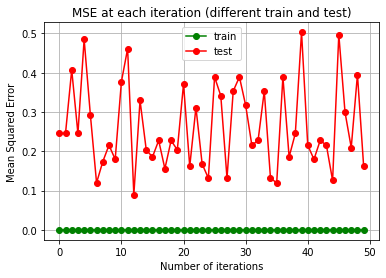

In [257]:
print(mse_train)
plt.plot(train_mse, 'o-', color='green', label='train')
plt.plot(test_mse, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Mean Squared Error')
plt.title("MSE at each iteration (different train and test)")
plt.show()

In [258]:
print(sum(test_mse)/len(test_mse))

0.26071856287425144


We can see that, in average, the MSE for test values is around 0.25. This is not the best score, but it's also not terrible.

Let's now do the same for the voting classifier.

In [259]:
from sklearn.metrics import mean_squared_error

train_mse = []
test_mse = []

my_log_final = LogisticRegression(solver = "liblinear", penalty="l2", random_state=42, class_weight="balanced") 
my_rf_final = RandomForestClassifier(criterion='gini', random_state=42, class_weight="balanced")
my_svm_final = NuSVC(nu = 0.3, class_weight = "balanced")

voting = VotingClassifier(estimators=[('lr', my_log_final), 
                                      ('rf', my_rf_final)],
                           voting = "soft", weights= None)

for seed in range(50):
    X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,1:], y, test_size=0.1, random_state=seed)
    voting.fit(X_train, y_train)
    y_train_predicted = voting.predict(X_train)
    y_test_predicted = voting.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_predicted)
    mse_test = mean_squared_error(y_test, y_test_predicted)
    train_mse.append(mse_train)
    test_mse.append(mse_test)
    print("Iteration: {} Train mse: {} Test mse: {}".format(seed, mse_train, mse_test))

Iteration: 0 Train mse: 0.13333333333333333 Test mse: 1.36
Iteration: 1 Train mse: 0.1111111111111111 Test mse: 1.89
Iteration: 2 Train mse: 0.11888888888888889 Test mse: 1.24
Iteration: 3 Train mse: 0.12555555555555556 Test mse: 1.51
Iteration: 4 Train mse: 0.12444444444444444 Test mse: 1.33
Iteration: 5 Train mse: 0.12777777777777777 Test mse: 2.07
Iteration: 6 Train mse: 0.12444444444444444 Test mse: 0.79
Iteration: 7 Train mse: 0.12444444444444444 Test mse: 1.5
Iteration: 8 Train mse: 0.11 Test mse: 1.26
Iteration: 9 Train mse: 0.1 Test mse: 0.79
Iteration: 10 Train mse: 0.13666666666666666 Test mse: 1.21
Iteration: 11 Train mse: 0.13 Test mse: 2.08
Iteration: 12 Train mse: 0.1322222222222222 Test mse: 0.9
Iteration: 13 Train mse: 0.10777777777777778 Test mse: 1.26
Iteration: 14 Train mse: 0.14333333333333334 Test mse: 1.54
Iteration: 15 Train mse: 0.1511111111111111 Test mse: 1.3
Iteration: 16 Train mse: 0.13666666666666666 Test mse: 0.88
Iteration: 17 Train mse: 0.122222222222222

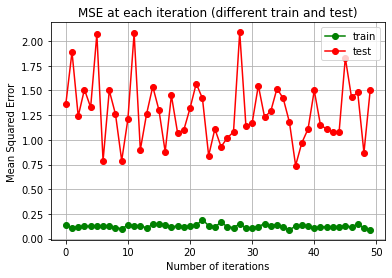

In [260]:
plt.plot(train_mse, 'o-', color='green', label='train')
plt.plot(test_mse, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Mean Squared Error')
plt.title("MSE at each iteration (different train and test)")
plt.show()

In [261]:
print(sum(test_mse) / len(test_mse))

1.2852


We can see that the MSE is actually much better (smaller) in the case of the Oversampling. This, and also the fact that Random Forest in the oversampling case have better predictions, brings us to choose as our final classificator the random forest trained with the oversampled data.

## The final classifier

We train it using the whole oversampled dataset to than use it with other possibly unlabeled data.

In [262]:
X1 = X_over.iloc[: , 1:]
y1 = y_over

final_classifier = RandomForestClassifier(criterion='gini', random_state=42)
final_classifier.fit(X1, y1)

RandomForestClassifier(random_state=42)

In [263]:
scores_final_classifier = cross_val_score(final_classifier, X1, y1, cv=10)
print("Cross validation score: ", scores_final_classifier.mean())

Cross validation score:  0.9453935502488997


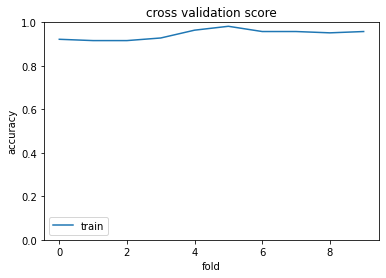

In [264]:
plt.plot(scores_final_classifier)
plt.title('cross validation score')
plt.ylabel('accuracy')
plt.xlabel('fold')
plt.ylim(0, 1)
plt.legend(['train'])
plt.show()

## Predicting the test features

In [265]:
anonymous_data = pd.read_csv("mldata_0003139812.TEST_FEATURES.csv",delimiter=",",engine='python',index_col=0)
anonymous_data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,categorical_feature_1
id,,,,,,,,,,,,,,,,,,,,,
0,-0.506069,1.468390,-0.453624,0.327954,1.931634,-0.467078,0.051505,-1.535948,1.895983,1.406309,...,1.951804,2.831198,0.391288,3.175494,-1.916592,-0.110949,1.642183,3.882079,1.951804,A
1,-0.251585,-1.274420,0.028992,2.988815,1.067474,-5.417207,-2.140307,1.988389,2.768058,-1.267715,...,-4.386928,-0.630758,0.947422,-0.946615,1.368015,1.346857,-1.858997,1.814611,-4.386928,A
2,0.087681,0.971594,1.866015,0.124089,-0.937837,-1.014015,3.494911,0.424571,4.298582,1.870054,...,1.311814,-1.549710,-1.121105,-3.813142,-0.737465,0.898413,-1.856037,-0.121436,1.311814,A
3,-1.550249,0.788675,0.221738,-2.145495,0.828235,-0.057623,-1.031188,2.432008,0.858693,1.282696,...,1.435498,0.384265,0.822382,1.267492,-2.117050,0.513621,-0.275175,1.174056,1.435498,A
4,-2.377075,-0.218776,0.377938,-1.277286,-0.544722,-1.364184,3.331522,0.191245,-0.566382,4.761378,...,1.958214,0.594499,1.253936,8.239638,1.206741,-3.590884,-0.098380,3.291919,1.958214,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.958467,-0.935308,-5.670817,-2.917933,5.468595,-2.549235,-0.348223,-1.736135,-0.582953,1.163307,...,0.912693,-3.427590,5.505820,1.628609,-2.919391,1.067150,5.533054,-2.393944,0.912693,C
996,4.344673,0.140741,-8.674854,-0.772870,4.102996,4.099064,0.065472,-1.513441,-7.187824,-1.100596,...,1.801188,1.450480,3.896582,4.164530,3.909730,1.375765,-2.746574,0.388744,1.801188,A
997,1.691418,-1.958269,6.739441,0.205744,-0.811517,-2.982955,-0.385263,0.216497,2.909358,2.831909,...,-2.346242,2.683378,1.148779,-1.773942,1.031572,1.577923,0.982091,-2.439735,-2.346242,C


First let's change the categorical values.

In [266]:
test_dataset = pd.get_dummies(data=anonymous_data, prefix=["cat"], columns=["categorical_feature_1"])
test_dataset.drop(columns=["cat_A"], inplace=True)

In [267]:
test_dataset

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,cat_B,cat_C
id,,,,,,,,,,,,,,,,,,,,,
0,-0.506069,1.468390,-0.453624,0.327954,1.931634,-0.467078,0.051505,-1.535948,1.895983,1.406309,...,2.831198,0.391288,3.175494,-1.916592,-0.110949,1.642183,3.882079,1.951804,0,0
1,-0.251585,-1.274420,0.028992,2.988815,1.067474,-5.417207,-2.140307,1.988389,2.768058,-1.267715,...,-0.630758,0.947422,-0.946615,1.368015,1.346857,-1.858997,1.814611,-4.386928,0,0
2,0.087681,0.971594,1.866015,0.124089,-0.937837,-1.014015,3.494911,0.424571,4.298582,1.870054,...,-1.549710,-1.121105,-3.813142,-0.737465,0.898413,-1.856037,-0.121436,1.311814,0,0
3,-1.550249,0.788675,0.221738,-2.145495,0.828235,-0.057623,-1.031188,2.432008,0.858693,1.282696,...,0.384265,0.822382,1.267492,-2.117050,0.513621,-0.275175,1.174056,1.435498,0,0
4,-2.377075,-0.218776,0.377938,-1.277286,-0.544722,-1.364184,3.331522,0.191245,-0.566382,4.761378,...,0.594499,1.253936,8.239638,1.206741,-3.590884,-0.098380,3.291919,1.958214,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.958467,-0.935308,-5.670817,-2.917933,5.468595,-2.549235,-0.348223,-1.736135,-0.582953,1.163307,...,-3.427590,5.505820,1.628609,-2.919391,1.067150,5.533054,-2.393944,0.912693,0,1
996,4.344673,0.140741,-8.674854,-0.772870,4.102996,4.099064,0.065472,-1.513441,-7.187824,-1.100596,...,1.450480,3.896582,4.164530,3.909730,1.375765,-2.746574,0.388744,1.801188,0,0
997,1.691418,-1.958269,6.739441,0.205744,-0.811517,-2.982955,-0.385263,0.216497,2.909358,2.831909,...,2.683378,1.148779,-1.773942,1.031572,1.577923,0.982091,-2.439735,-2.346242,0,1


In [268]:
predictions = final_classifier.predict(test_dataset)
predictions = predictions.astype(int)
predictions

array([4, 3, 1, 4, 4, 2, 0, 2, 2, 4, 4, 1, 2, 2, 1, 4, 2, 4, 3, 2, 2, 2,
       1, 2, 3, 2, 2, 2, 2, 4, 0, 0, 3, 2, 1, 2, 0, 2, 4, 4, 2, 4, 4, 2,
       4, 2, 4, 2, 2, 3, 2, 3, 1, 3, 3, 2, 3, 1, 4, 2, 2, 2, 1, 3, 4, 4,
       1, 1, 2, 3, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 1, 4, 2, 4, 4,
       4, 4, 1, 2, 3, 2, 4, 4, 4, 1, 4, 1, 2, 4, 2, 0, 0, 4, 0, 3, 0, 4,
       2, 4, 2, 1, 4, 2, 4, 4, 3, 1, 1, 4, 2, 4, 4, 1, 2, 3, 4, 4, 2, 2,
       4, 2, 2, 4, 4, 3, 4, 2, 3, 2, 2, 4, 2, 4, 2, 4, 4, 2, 1, 2, 4, 1,
       4, 4, 2, 0, 2, 2, 4, 0, 2, 4, 2, 3, 2, 4, 1, 2, 2, 2, 4, 2, 4, 4,
       4, 1, 4, 2, 2, 4, 2, 3, 1, 4, 2, 3, 3, 4, 2, 3, 2, 3, 2, 3, 2, 1,
       4, 2, 1, 4, 4, 2, 4, 0, 4, 1, 2, 2, 3, 2, 4, 4, 2, 2, 2, 4, 2, 4,
       2, 4, 4, 4, 4, 2, 2, 0, 2, 4, 2, 3, 1, 3, 2, 2, 2, 3, 4, 2, 2, 4,
       2, 2, 4, 0, 1, 0, 4, 1, 2, 4, 4, 0, 2, 1, 4, 1, 4, 4, 2, 4, 2, 2,
       4, 4, 2, 4, 3, 4, 4, 0, 3, 2, 1, 2, 4, 2, 4, 2, 0, 4, 4, 2, 1, 4,
       4, 0, 1, 4, 2, 4, 2, 0, 2, 4, 2, 4, 0, 4, 2,

In [269]:
file = open("test_predictions.txt", "w+")
 
for i in predictions:
  file.write(str(i) + "\n")
file.close()